# INF8111 - Fouille de données / Datamining
## Automne 2020 - TP3 - Fouille de réseaux sociaux / Datamining social networks
### Membres de l'équipe / Team members
-Sabzi Dizajyekan (2078921) 1

-Desclaux (2097696) 2

-Berrais-Sanchez (2092882) 3


## Instructions de remise / Submission
Le travail sera réalisé avec la  même équipe que pour les TPs précédents. 
Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Tout devra être remis avant le **5 décembre 2020 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 10 points

Partie 2: 4 points

Partie 3: 6 points

Pour un total de 20 points.


---

## Submission
The work will be carried out with the same team as for the previous TPs.
You must put back in the submission box on moodle:

1. this file renamed TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **December 5th 2020 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 10 points

Part 2: 8 points

Part 3: 6 points

For a total of 20 points on 20 points.


## Réseaux sociaux / Social networks
Les réseaux sociaux occupent une grande partie de la vie humaine. Chaque personne appartient tout le long de sa vie à différentes communautés. Avec le rassemblage de ces informations sur les différentes plateformes en ligne de réseaux sociaux, les analystes de données ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec plusieurs impacts sur plusieurs aspects tels que la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse d'un réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.


---

## Social networks
Social networks are a major component of the humain life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parties, we provide you with all the csv containing the social networks to be analyzed.


# 1. LPAm+ (10 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour rassembler les personnes dans des communautés selon les liens entre eux. 

## LPAm+
Dans cette partie, vous implémenterez l'algorithme LPAm+ pour détecter les communautés parmi les personnages de Games of Thrones. Vous devez utiliser les CSV *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut combiner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'elle peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

# 1. LPAm+ (10 points)


## Community detection
Community detection in a social network is a frequent manipulation when analyzing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of Games of Thrones. You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details but you don't need to as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [ ]:
# # vous pouvez bien sûr utiliser anaconda pour installer les packages
# !pip install --user numpy
# !pip install --user pandas
# !pip install --user matplotlib
# !pip install --user networkx

In [3]:
import numpy as np
import networkx as nx
import random
import itertools
import math
import os
import pandas as pd

In [4]:
class LPAmPlus:
    """
    Contructor
    """

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph


        """
        Assign a label to each node
        """
        for i, node in enumerate(self.graph.nodes):
            self.graph.nodes[node]['label'] = i #we assign as a label the node's index
            
            self.graph.nodes[node]['index'] = i #this is added by me to facilitate steps in further computations
            
            
        """
        labels gives all the communities present in the network
        """
        self.labels = list(range(self.graph.number_of_nodes())) #each label is an int, there are n labels

       

    
    """
    Term to optimize when replacing labels
    """
    
    def label_evaluation(self, current_node, new_label):
        
        n = self.graph.number_of_nodes() # number of nodes in graph
        m = self.graph.number_of_edges() # number of edges in graph
        B = nx.linalg.modularity_matrix(self.graph) #modularity matrix
        Q = 0
        
        current_node_index = self.graph.nodes[current_node]['index']
        
        for u, node_u in enumerate(self.graph.nodes):
            if node_u == current_node:# we don't consider the current node in the sum 
                continue
            else:
                if self.graph.nodes[node_u]['label'] == new_label: 
                    Q += B[u, current_node_index]
        return Q

    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
        graph_labels = self.labels # we do the process for all possible labels. We could
        # refine the search place by looking only into the neighbour' labels, 
        # but it means more code to write
        initial_label = self.graph.nodes[current_node]['label']
        label_evaluation_list = np.zeros(len(graph_labels))
        
        for i, label in enumerate(graph_labels):
            label_evaluation_list[i] = self.label_evaluation(current_node, label)
        
        # generate a list of indices where label evaluation is at max
        max_value = np.max(label_evaluation_list)
        indices_with_max_value = [i for i, j in enumerate(label_evaluation_list) if j == max_value]
        
        #randomly select a new label
        new_label_idx = random.choice(indices_with_max_value)
        
        # update the node's label
        self.graph.nodes[current_node]['label'] = graph_labels[new_label_idx]   
        
        # check if the label is still in the graph
        for node in self.graph.nodes:
            if self.graph.nodes[node]['label'] == initial_label: #i.e. the label still exists in the graph. We can stop
                return True 
            
        # if we arrive here, it means the initial label doesn't exist in the graph anymore. We need to
        # remove it from self.labels
        self.labels.remove(initial_label)
        
        # now we can terminate
        return True
    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        m = self.graph.number_of_edges() # number of edges in graph
        B = nx.linalg.modularity_matrix(self.graph) #modularity matrix        
        Q = 0 #initialise modularity value
        
        for u, node_u in enumerate(self.graph.nodes):
            for v, node_v in enumerate(self.graph.nodes):
                if self.graph.nodes[node_u]['label'] == self.graph.nodes[node_v]['label']: 
                    # if the nodes have the same label
                    Q += B[u, v]
        
        Q /= 2*m  # normalise modularity value
        return Q
    
    
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self): 
        # Initialisation
        old_modularity = - np.inf 
        new_modularity = self.modularity()

        while (new_modularity > old_modularity):     
            # We update all the labels in our graph
            for node in self.graph.nodes:
                self.update_label(node)
            
            # update modularity values
            old_modularity = new_modularity
            new_modularity = self.modularity()
    
    
    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        graph_labels = self.labels
        old_modularity = self.modularity()
        
        # Initialisng output
        label_source = None
        label_target = None
        nodes_to_change = []
        
        # we iterate over all the labels
        for i, label1 in enumerate(graph_labels):
            for j in range(i+1, len(graph_labels)):
                label2 = graph_labels[j]
                changed_nodes = []
                
                #switch all labels2 into label1 and remember which nodes have changed
                for node in self.graph.nodes:
                    if (self.graph.nodes[node]['label'] == label2):
                        self.graph.nodes[node]['label'] = label1
                        changed_nodes.append(node)
                        
                # we compute the modularity when changing all the labels
                new_modularity = self.modularity()
                if (new_modularity > old_modularity): 
                    # we have found a label merge that increase modularity
                    old_modularity = new_modularity
                    label_source = label2
                    label_target = label1
                    nodes_to_change = changed_nodes

                # change labels back to label2
                for node in changed_nodes:
                    self.graph.nodes[node]['label'] = label2

        if (label_source): #i.e. we have found a label change that increases modularity
            for node in nodes_to_change:
                self.graph.nodes[node]['label'] = label_target
            self.labels.remove(label_source) #update labels
            return True
        
        else: # no merging of communities increases modularity
            return False
    
    
    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):
        # we call LPAm for the first time
        self.LPAm()
        
        #we see if we can merge communities
        while self.merge_communities():
            #if it is the case, we call LPAm once again
            self.LPAm()
        return True
            
    
    

### 1.1 Dataset (0.5 point)

Nous vous avons fourni les CSV pour toutes les saisons de Games of Thrones. Vous devez maintenant représenter ces réseaux en utilisant les deux CSV fournis pour chaque saison: un pour les sommets et un pour les arêtes. 


#### Implémentation
1. Implémentez  la fonction  *`load_unweighted_network`*. Cette fonction retourne le réseau non dirigé et sans poids.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un petit toy dataset. Vous devriez avoir quelque chose de similaire:
![title](data/picture.png)


---
We have provided you with the csv for all the seasons of Games of Thrones. You must now represent each of those networks in code using two csv for each season: the one for the nodes and the one for the edges.


#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.

Use the function `test_load` to verify your implementation of the function. This test use a toy dataset. You should obtain a result similar to this:
![title](data/picture.png)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
toynodes_df = pd.read_csv("/content/drive/MyDrive/data/toy-nodes.csv")
toyedges_df = pd.read_csv("/content/drive/MyDrive/data/toy-edges.csv")


In [30]:
import csv
import pandas as pd
import networkx as nx


def load_unweighted_network(node_csv, edge_csv):
    #TODO
    node_df=pd.read_csv(node_csv)
    edge_df=pd.read_csv(edge_csv)
    network=nx.Graph()
    for node in node_df['Id']:
      network.add_node(node)
    for ind in edge_df.index:
      network.add_edge(edge_df['Source'][ind],edge_df['Target'][ind])
    return network

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


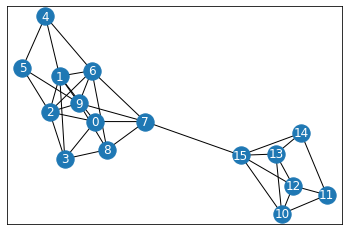

In [32]:
import matplotlib.pyplot as plt
def test_load():
    network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes.csv", "/content/drive/MyDrive/data/toy-edges.csv")
    nx.draw_networkx(network,font_color='white')
    print(network.nodes)
    plt.show()

test_load()

### 1.2  Modularité / Modularity (1 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: le nombre d'arêtes
- l: l'étiquette du sommet
- u, v: des sommets dans le réseau
- B: la matrice de modularité où chaque élément vaut $A_{uv} - P_{uv}$
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l_v)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

Elle peut aussi être définie comme: $$Q=\sum_{t=1}^{N_c}\left(\frac{I_t}{m}-\left(\frac{D_t}{2m}\right)^2\right)$$

- m: le nombre d'arêtes
- Nc: le nombre de communautés
- t: une communauté dans le réseau
- $I_t$: le nombre d'arêtes dans la communauté t c'est-à-dire que les deux sommets de l'arête appartiennent à t
- $D_t$: la somme des degrés de tous les sommets appartenant à t

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Prenez la définition présentée que vous voulez. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les nodes agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.413.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

The modularity can also be defined like this: $$Q=\sum_{t=1}^{N_c}\left(\frac{I_t}{m}-\left(\frac{D_t}{2m}\right)^2\right)$$

- m: number of edges
- Nc: the number of community in the graph
- t: a community in the graph
- $I_t$: the number of arc in the community t meaning all arcs that have both nodes in the community t
- $D_t$: the sum of degree of all the nodes in the community t

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `linalg.modularity_matrix` from networkx to calculate B. You can implement whichever definition for the modularity. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.413.

In [10]:
def test_modularity():
    social_network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes.csv", "/content/drive/MyDrive/data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in [0,1,2,3,4,5,6,7,8,9]:
        lpam.graph.nodes[i]['label'] = 0
    for i in [10,11,12,13,14,15]:
        lpam.graph.nodes[i]['label'] = 1
    print("Modularity: {}".format(lpam.modularity()))

test_modularity()

Modularity: 0.41265306122449


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (1.5 point)

Comme mentionné plus haut, l'algorithme est fortement basé sur son optimisation de la modularité. Il vous est maintenant demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme donne la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction choisit la nouvelle étiquette pour le sommet actuel. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et change leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimun de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe dans la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.399 avec 4 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.399 with 4 communities.

In [11]:
def test_lpam():
    social_network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes.csv", "/content/drive/MyDrive/data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

Modularity: 0.39877551020408186
Communities: [3, 5, 8, 12]


### 1.5 LPAm+ (2 point)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va reessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne peut plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction regarde si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.413 et 2 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.413 and 2 communities.

In [12]:
def test_lpam_plus():
    social_network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes.csv", "/content/drive/MyDrive/data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

Modularity: 0.41265306122449
Communities: [3, 12]


### 1.6 GOT dataset (3 points)

Rouler votre algorithme sur les données de Games of Thrones de chaque saison et comparer ce que vous obtenez et les vraies communautés. Le ground truth se trouve dans la colonne Community des csv. Des liens sont présents entre des personnages lorsque: 
- Personnage A parle directement après Personnage B
- Personnage A parle de Personnage B
- Personnage C parle de Personnage A et Personnage B
- Personnage A et Personnage B font une action ensemble dans une scène (ex: quittent les lieux, A regarde B, sont assis à une table, etc)
- Personnage A et Personnage B apparaissent ensemble dans une scène

Commencez par calculer le ARI (ajusted Rand index) de vos résultats. $$ ARI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: le nombre de sommets
- TP: True positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats et dans le ground truth
- TN: True négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans le ground truth
- FP: False positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans le ground truth
- FN: False négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes alors qu'ils sont dans la même communauté dans le ground truth


**N.B**: Ce n'est pas le nom des communautés que vous avez trouvé qui importante mais leur composition. Autrement dit, un TP est si le sommet a et le sommet b se trouve dans la même communauté dans vos résultats et dans le ground truth.


Répondez aux questions suivantes. Elles servent comme piste de réflexion pour votre analyse.

- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement? 
- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?

Vous pouvez faire les manipulations que vous voulez pour mieux présenter vos résultats et mieux appuyer vos affirmations. 

---

Run your algorithm over the Games of Thrones data from each season and compare what you get and the real communities. The ground truth is found in the Community column in the csv. Links are found between characters A and B when:
- Character A talks directly after Character B
- Character A talks about Character B
- Character C talks about Character B and A
- Character A and Character B does an action together in a scene (ex: leave the room, A looks toward B, are seated together at a table, etc)
- Character A and Character B are both present in a scene

Start by calculating the ARI (adjusted Rand index) of your results. $$ ARI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well on all seasons or for some only? 
- Explain why you obtained those results by analysing the communities from each season. Which particularities offer better results? Which hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [ ]:
# !pip install nxviz

In [ ]:
def compute_ARI(node_csv, network):
    """
    This function is set to compute the ARI of the results we obtain on a given prediction using LPAm+.
    We compare the predicted classes with the classes stored in the nodes.csv file
    
    Input:
        node_csv: path to csv
        network: networkx.graph object, with a 'label' attribute
    
    """
    node_df = pd.read_csv(node_csv, index_col = 'Id')
    names = {key: key for key in list(network.nodes)}
    labels = nx.get_node_attributes(network,'label').values()
    results_df = pd.DataFrame(labels, index = names, columns = ['Predicted_Class'])
    results_df = node_df.join(results_df)
    results_df = results_df.reset_index()
    TP = 0
    TN = 0
    predictions_summary = match_label_to_community(results_df)
    for i in range(network.number_of_nodes()):
        for j in range (i+1, network.number_of_nodes()):
            node1_gt = results_df.iloc[i]['Community']
            node1_predicted = results_df.iloc[i]['Predicted_Class']
            node2_gt = results_df.iloc[j]['Community']
            node2_predicted = results_df.iloc[j]['Predicted_Class']

            if (node1_gt == node2_gt) and (node1_predicted == node2_predicted):
                TP +=1
            elif (node1_gt != node2_gt) and (node1_predicted != node2_predicted):
                TN += 1

    # math.comb doesn't work, I don't know why, so I just compute it manually
    n = len(results_df.index)
    comb = math.factorial(n)/(2 * math.factorial(n - 2))
    ARI = (TP + TN) / comb
    return ARI, predictions_summary


In [ ]:
def match_label_to_community(df):
    """
    This function takes as an input the df with prediced labels and GT communities. It looks, for each
    community, which label was most predicted and maps the community to that value
    """
    communities = set(df['Community'])
    predictions = set(df['Predicted_Class'])
    res = {}
    for c in communities: 
        res[c] = {}
        
        for p in predictions:
            res[c][p] = 0
    for i in range(len(df.index)):
        c = df.iloc[i]['Community']
        p = df.iloc[i]['Predicted_Class']
        res[c][p] +=1
    
    out = pd.DataFrame.from_dict(res, orient = 'index')
    out.columns.name = 'Predicted Labels'
    out = out.style.background_gradient(cmap='Blues', axis = 'columns')

    return out


In [ ]:
def compute_all_seasons():
    """
    THis function outputs results for all seasons of GOT
    """
    datapath = '/content/drive/MyDrive/data'

    for season in  range(1, 9):
        print('Working on season ' + str(season))
        death_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'deaths.csv')
        edges_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'edges.csv')
        nodes_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'nodes.csv')

        network = load_unweighted_network(nodes_csv, edges_csv)

        lpam = LPAmPlus(network)

        lpam.find_communities()

        graph = lpam.graph

        draw_network(graph, season)
        ARI, classes = compute_ARI(nodes_csv, graph)
        print("Results for Season {}".format(season))
        print("Modularity: {}\nNumber of Communities: {}".format(lpam.modularity(), len(lpam.labels)))
        print("ARI: {}".format(ARI))


In [ ]:
from IPython.display import display
# import seaborn as sns
def compute_results(season):
    datapath = '/content/drive/MyDrive/data'

    edges_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'edges.csv')
    nodes_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'nodes.csv')
    node_df = pd.read_csv(nodes_csv, index_col = 'Id')

    network = load_unweighted_network(nodes_csv, edges_csv)
    m = len(network.edges())
    n = len(network.nodes())
    lpam = LPAmPlus(network)

    lpam.find_communities()

    graph = lpam.graph
    draw_network(graph, season)
    ARI, predictions_summary = compute_ARI(nodes_csv, graph)
    print("Results for Season {}".format(season))
    print('m/n : {}'.format(round(m/n, 2)))
    print("Modularity: {}\nNumber of Communities: {}".format(round(lpam.modularity(), 3), len(lpam.labels)))
    print('Number of Communities in the Ground Truth: {}'.format(len(set(node_df['Community']))))
    print("ARI: {}".format(round(ARI, 3)))
    print('Summary of the predictions: \n')
    display(predictions_summary)
#     sns.heatmap(predictions_summary, annot=True)
    return graph, season

In [ ]:
from itertools import count
import nxviz as nxv
def draw_network(network, season, plotting_mode = 'classic'):
    """
    This function is only used for plotting a  network
    
    Input:
        network: networkx.graph object, with a 'label' attribute
        season: int, the season number (just for title)
        plotting_mode: 'classic', classic networkx plot, default
                       'circular', circle plot with nxviz
    Output:
        matplotlib figure
    """
    SAVE_FIG = 0
    
    
    
    if plotting_mode == 'classic':
        plt.figure(figsize = (15, 15))
        # Defining all the variables for our drawing
        labels = set(nx.get_node_attributes(network,'label').values())
        mapping = dict(zip(sorted(labels),count()))
        nodes = network.nodes()
        colors = [mapping[network.nodes[n]['label']] for n in nodes]
        names = {key: key for key in list(network.nodes)}

        #Actually drawing the network
        pos = nx.spring_layout(network)
        ec = nx.draw_networkx_edges(network, pos, alpha = 0.2)
        nc = nx.draw_networkx_nodes(network, pos, nodelist=nodes, node_color=colors, 
                                    node_size=100, cmap=plt.cm.gist_rainbow)
        lc = nx.draw_networkx_labels(network, pos, names, font_size = 6, font_color = 'k')
        plt.title('LPAM+ algorithm on Season {} creates {} communities'.format(season, len(labels)), fontsize = 20)
    
    
    if plotting_mode == 'circular':
        labels = set(nx.get_node_attributes(network,'label').values())
        h = nx.relabel_nodes(network, lambda x: x.replace('_', ' '))
        c = nxv.CircosPlot(h, node_labels=True, node_grouping = 'label', node_color = 'label', 
                   node_label_layout='rotation', figsize=(10,10))
        c.draw()
#         plt.title('LPAM+ algorithm on Season {} creates {} communities'.format(season, len(labels)), fontsize = 15)

    
    if SAVE_FIG:
        plt.savefig('Season' + str(season))

In [ ]:
# if you want to compute all seasons at once, uncomment below

# compute_all_seasons()

In [ ]:
from time import time
start = time()

### Season 1

Results for Season 1
m/n : 4.36
Modularity: 0.453
Number of Communities: 6
Number of Communities in the Ground Truth: 7
ARI: 0.927
Summary of the predictions: 



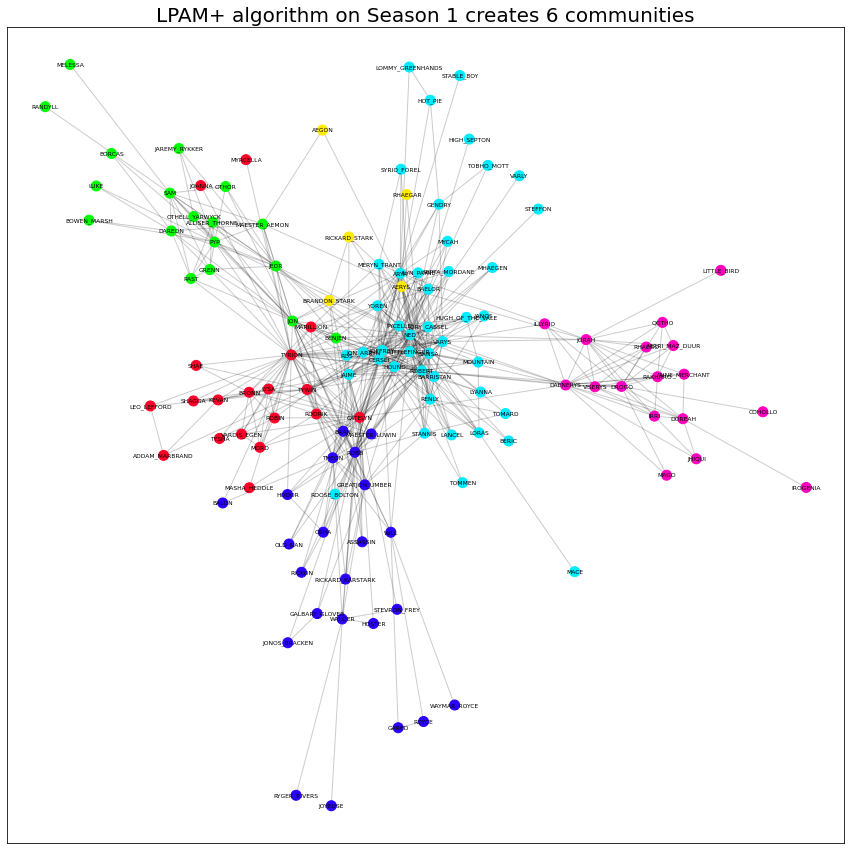

In [ ]:
g1, s1 = compute_results(1)

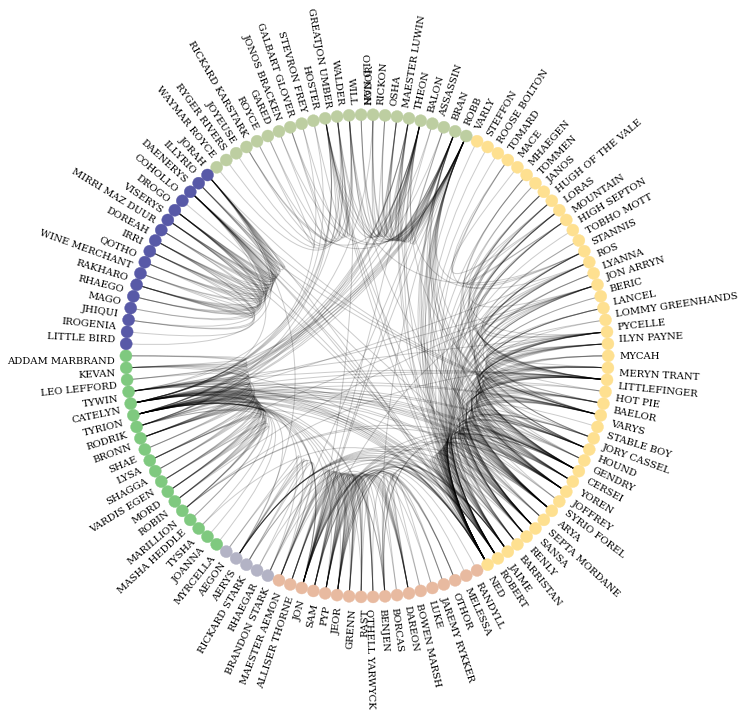

In [ ]:
draw_network(g1, s1, 'circular')

### Season 2

Results for Season 2
m/n : 3.77
Modularity: 0.57
Number of Communities: 6
Number of Communities in the Ground Truth: 7
ARI: 0.978
Summary of the predictions: 



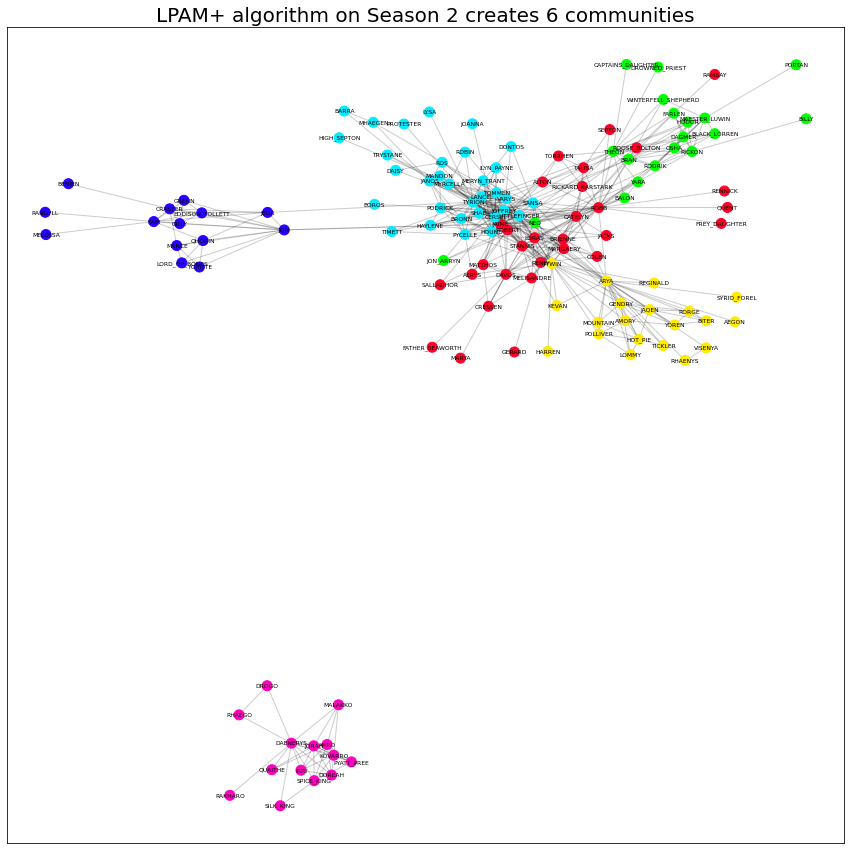

In [ ]:
g2, s2 = compute_results(2)

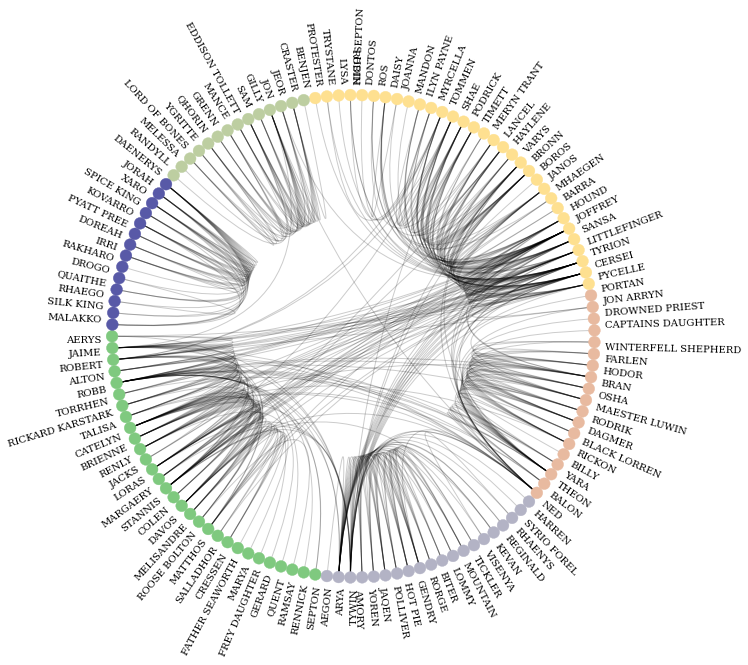

In [ ]:
draw_network(g2, s2, 'circular')

### Season 3

Results for Season 3
m/n : 4.08
Modularity: 0.627
Number of Communities: 5
Number of Communities in the Ground Truth: 9
ARI: 0.926
Summary of the predictions: 



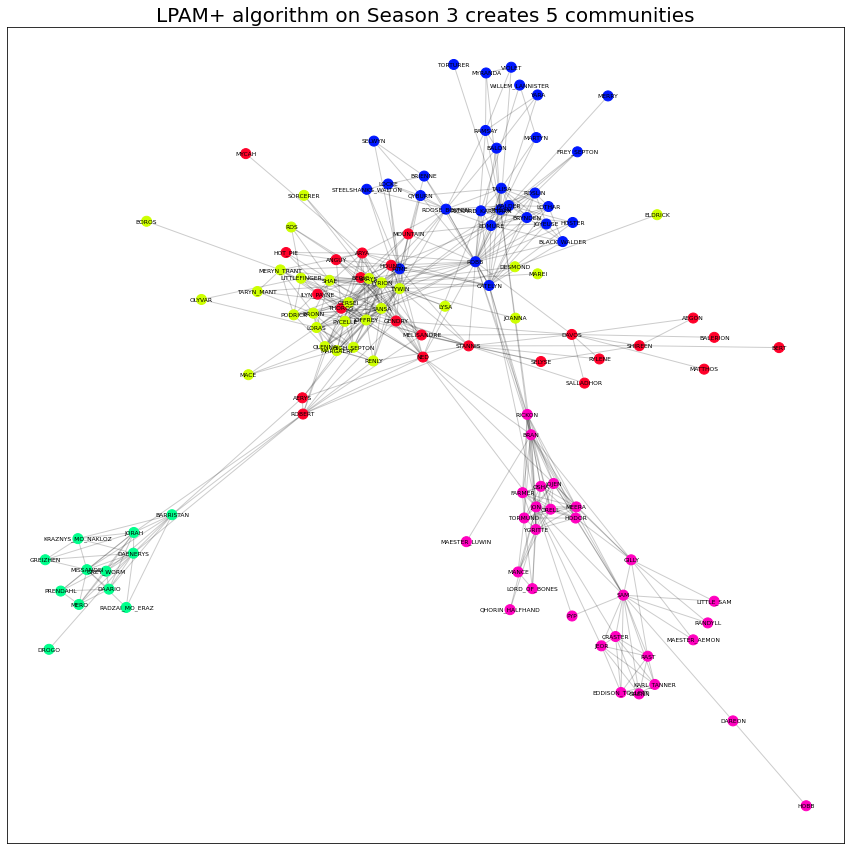

In [ ]:
g3, s3 = compute_results(3)

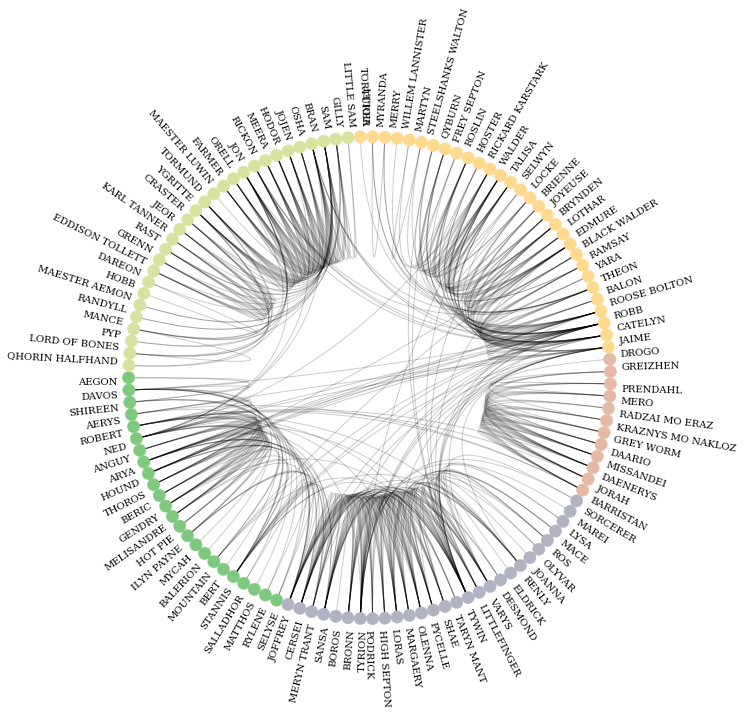

In [ ]:
draw_network(g3, s3, 'circular')

### Season 4

Results for Season 4
m/n : 3.89
Modularity: 0.601
Number of Communities: 8
Number of Communities in the Ground Truth: 9
ARI: 0.928
Summary of the predictions: 



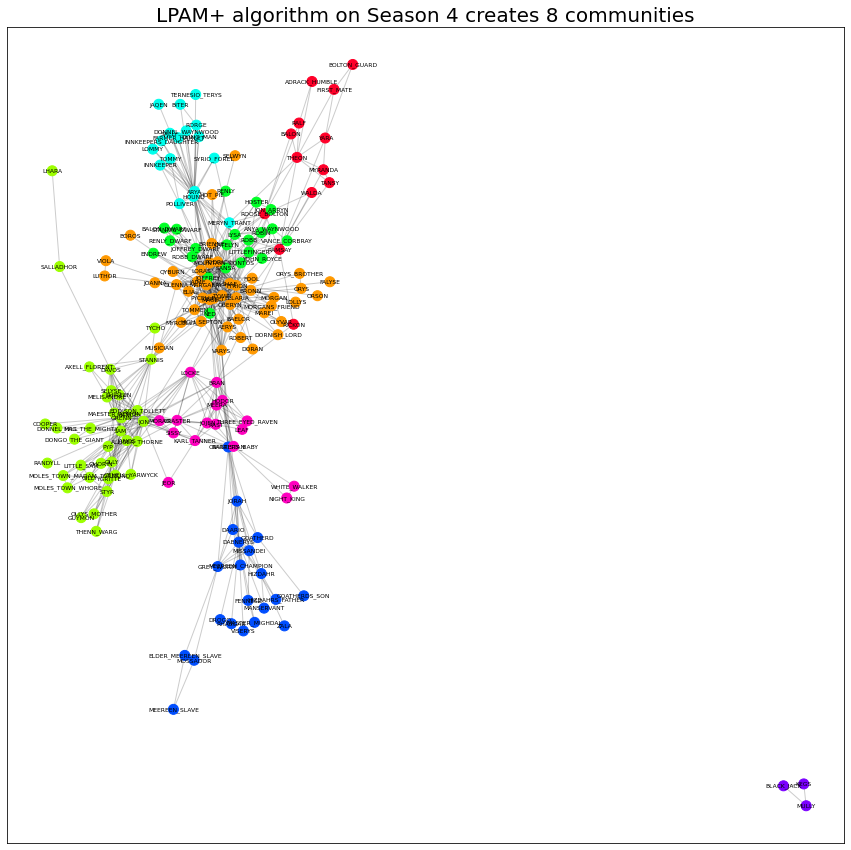

In [ ]:
g4, s4 = compute_results(4)

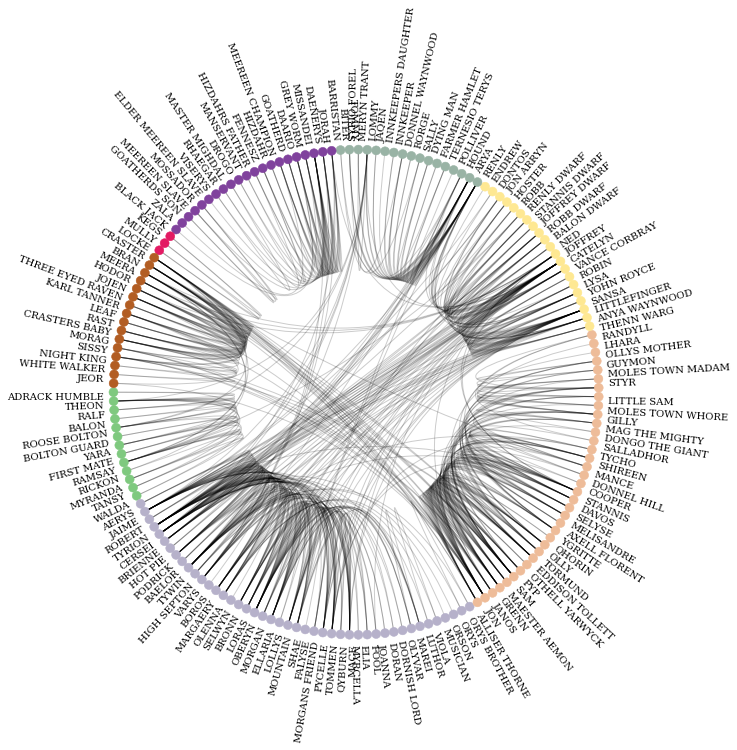

In [ ]:
draw_network(g4, s4, 'circular')

### Season 5

Results for Season 5
m/n : 3.33
Modularity: 0.67
Number of Communities: 6
Number of Communities in the Ground Truth: 6
ARI: 0.981
Summary of the predictions: 



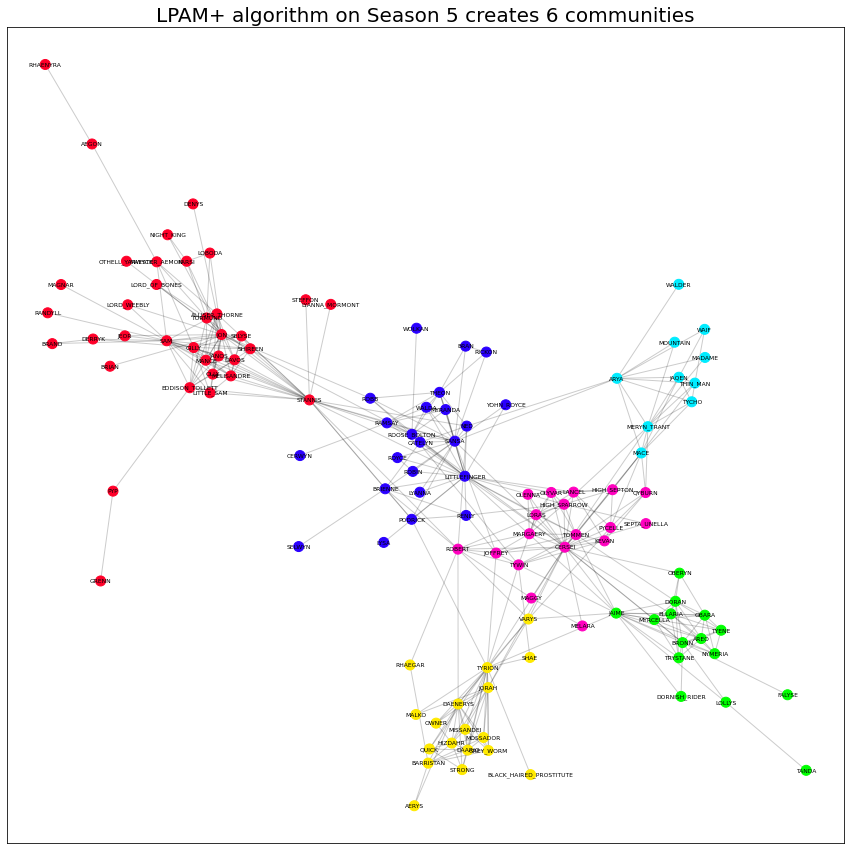

In [ ]:
g5, s5 = compute_results(5)

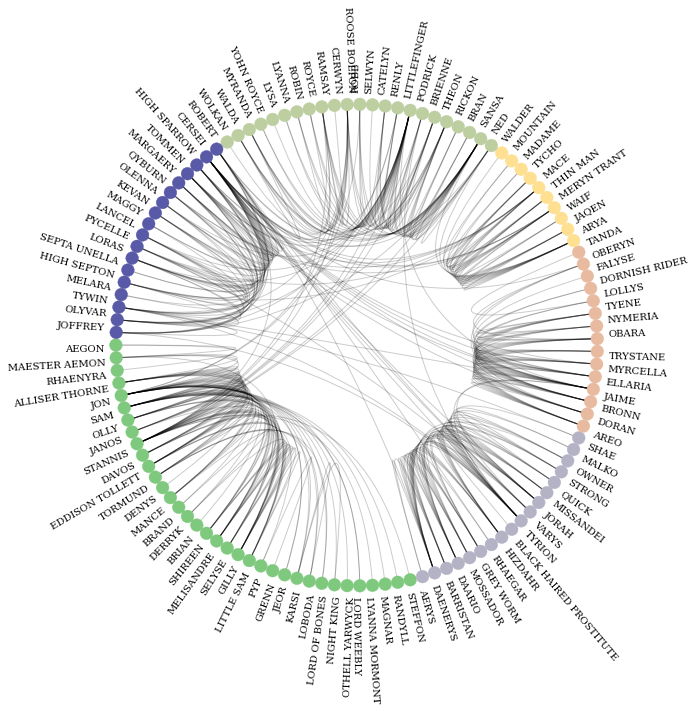

In [ ]:
draw_network(g5, s5, 'circular')

### Season 6

Results for Season 6
m/n : 3.81
Modularity: 0.649
Number of Communities: 8
Number of Communities in the Ground Truth: 9
ARI: 0.944
Summary of the predictions: 



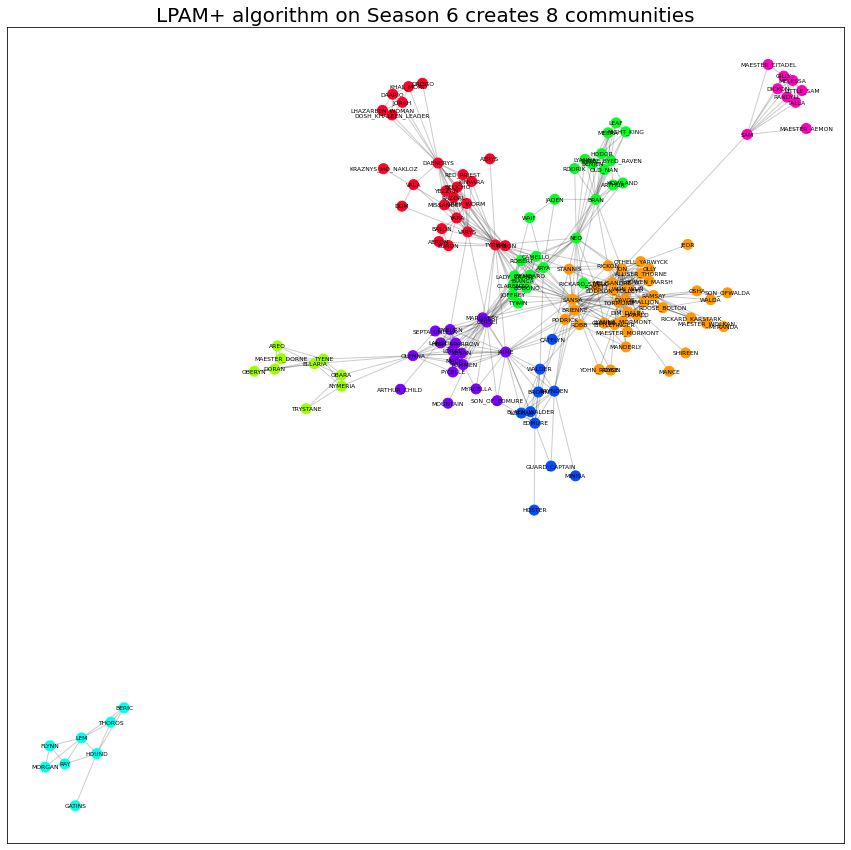

In [ ]:
g6, s6 = compute_results(6)

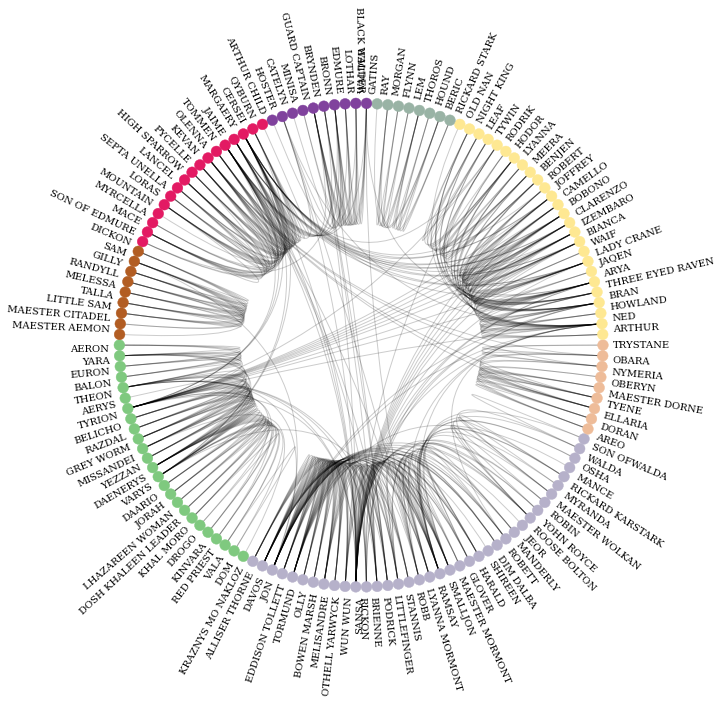

In [ ]:
draw_network(g6, s6, 'circular')

### Season 7

Results for Season 7
m/n : 5.09
Modularity: 0.321
Number of Communities: 5
Number of Communities in the Ground Truth: 4
ARI: 0.888
Summary of the predictions: 



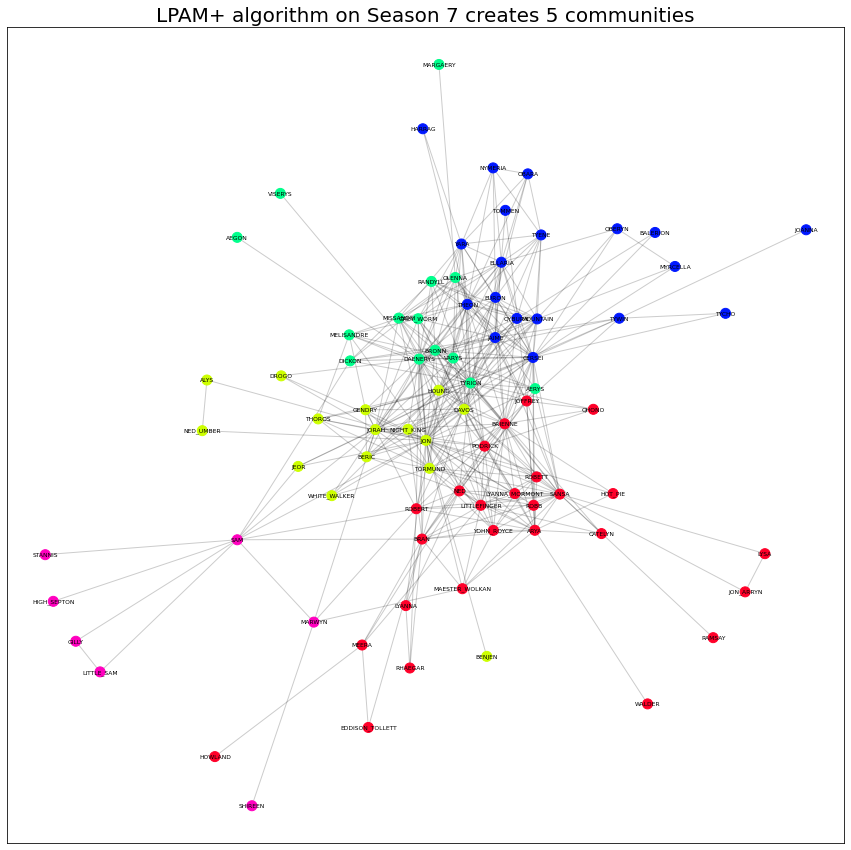

In [ ]:
g7, s7 = compute_results(7)

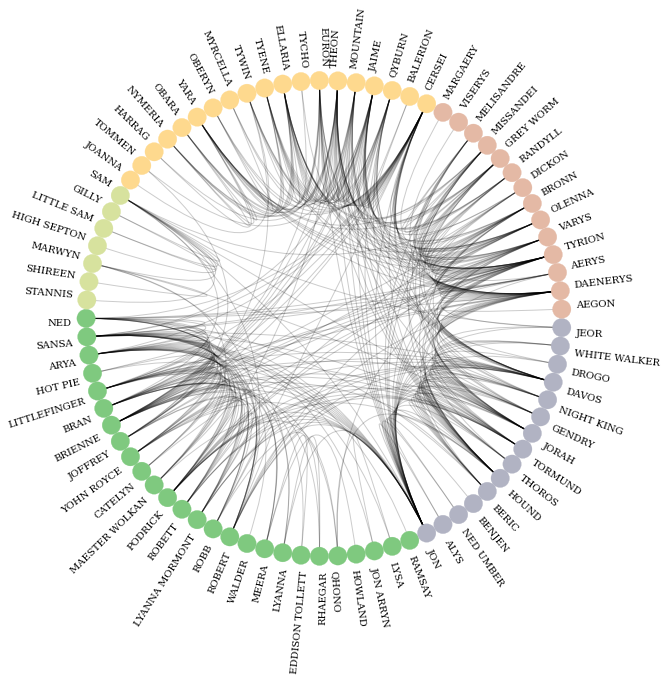

In [ ]:
draw_network(g7, s7, 'circular')

### Season 8

Results for Season 8
m/n : 7.47
Modularity: 0.209
Number of Communities: 5
Number of Communities in the Ground Truth: 5
ARI: 0.513
Summary of the predictions: 



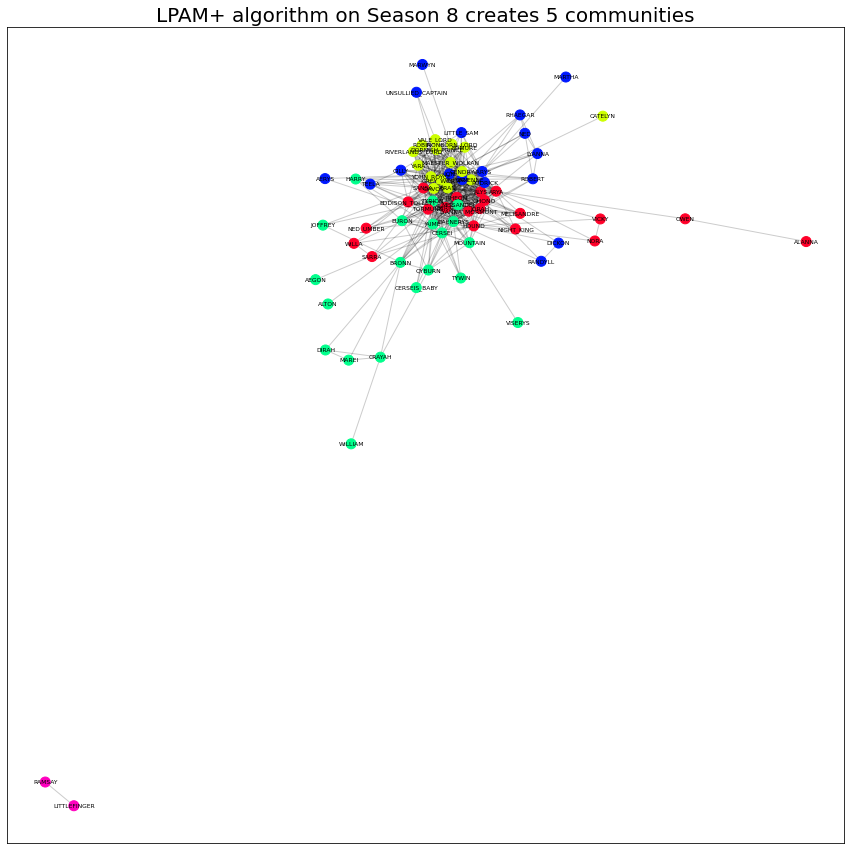

In [ ]:
g8, s8 = compute_results(8)

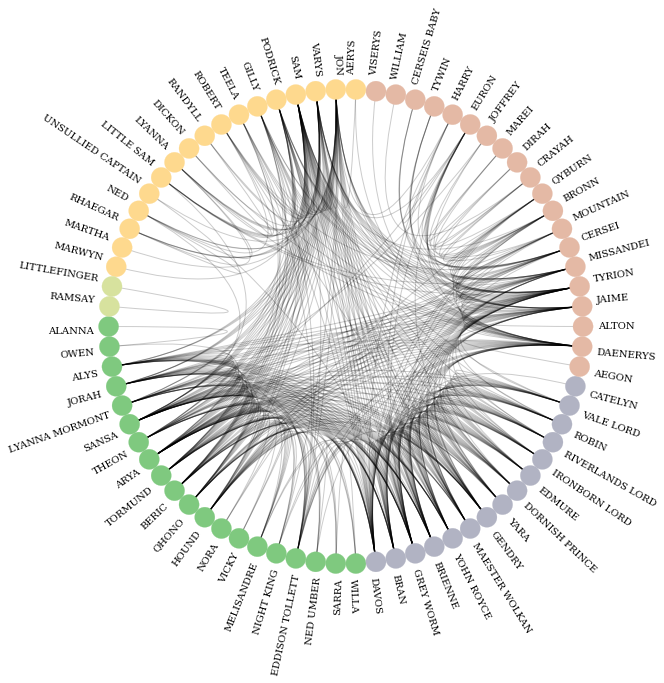

In [ ]:
draw_network(g8, s8, 'circular')

In [ ]:
end = time()
T = int(end - start)
print('Time Elapsed for all 8 seasons is {}min {}sec'.format(T//60, T%60))

Time Elapsed for all 8 seasons is 5min 58sec


#### Analyse / Analysis
For each season, results presented are as follows:
- The ratio between the number of edges (m) and the number of nodes (n) in the graph
- The Network's Modularity
- Number of Communities predicted by LPAm+
- Number of Communities in the ground truth (i.e. in the appropriate nodes.csv)
- ARI of our predictions with regard to the ground truth
- A pandas dataframe showing which were the predicted labels for each community in the ground truth. The darkest colours show the highest values of each row
- 2 visual representations of our graphs:
    - The first one, named 'classic', is the graph plotted with a spring layout. Each color corresponds to a predicted label by LPAm+
    - The second, named 'circular', was plotted using nxviz Circosplot method. This method was used to outline the differences between intra-community edges and inter-community edges. Each color corresponds to a predicted label my LPAm+
        
We make 4 major observations:

Firstly, there is a higher ARI value when LPAm+ managed to increase the modularity above 40%. This is the case for Seasons 1 to 6, and they all have an ARI above 90%. On the contrary, Seasons 7 and 8 show low values of modularity (resp. 0.21 and 0.32) and ARI (resp. 0.51 and 0.89). However, a high ARI doesn't always mean a perfect reconstruction of communities, as shows Season 3. Indeed, in this example, the Ground Truth shows 9 Communities, but LPAM+ only computes 5. 

Secondly, we observe that generally there is a smaller number of predicted communities than the Ground Truth suggests. When deep-diving into the prediction summaries, one can observe that LPAm+ tends to merge communities together. A good example is seen in Season 3: Craster's Keep, The North and The Wall are all merged into the same community (label 26). But when we look at the circular plot, we can see that this predicted community, in orange on the right hand side, has a high number of intra-community edges, and a low number of inter-community edges. This reasoning shows a major characteristic of LPAm+: it merges into a single community nodes that are isolated from others. It is interesting to see that in the series these 3 merged communities are actually geographically close as well as isolated from the rest of the world. 

We therefore understand that when looking at the 'circular' graph, one can have a first idea of the algorithm's outcome just by looking at the density inside the circle. A very low density will lead to a high ARI (e.g. Season 5, ARI = 98 %), whereas a high density will lead to a poorer ARI (e.g. Season 8, ARI = 21%). One must also underline the extremely high precision of predictions in Season 5, with only 4 miscorrect predictions out of 118 nodes.

Thirdly, one can observe that small communities tend to be merged into large ones. In Season 1 for instance, the Orphan community (size=2) is predicted to belong to the same community as King's Landing (size = 40). Similarly, in Season 2, the Janos Community (size=1) is also merged with King's Landing (size=31). If in the majority of the seasons, the algorithm merges theoretical communities into a single one, the opposite happens in Season 8. This poor performance can be explained by the algorithm's inability to increase significantly the network's modularity.

Finally, we must point out that LPAm+ proves to be unaffected when the network's size increases, as shows Season 6, which shows outstanding results (Modularity = 65% , ARI = 94%, with 142 Nodes). Actually, it seems to be the ratio of edges over nodes that has an influence on the algorithm's performance, as shown below.

Text(0.5, 1.0, 'Evolution of the ARI as a function of m/n')

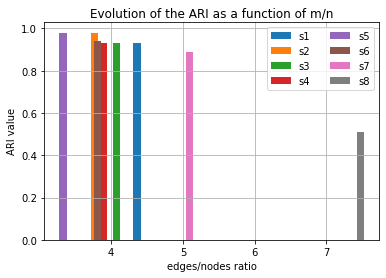

In [ ]:
m_over_n_values = [4.36, 3.77, 4.08, 3.89, 3.33, 3.81, 5.09, 7.47] #data extracted according to results above
ARI_values = [0.93, 0.98, 0.93, 0.93, 0.98, 0.94, 0.89, 0.51] #data extracted according to results above

for i in range(8):
    plt.bar(m_over_n_values[i], ARI_values[i], label = 's' + str(i+1), width = 0.1)
plt.legend(loc = 'best', ncol = 2)
plt.grid()
plt.xlabel('edges/nodes ratio')
plt.ylabel('ARI value')
plt.title('Evolution of the ARI as a function of m/n')

# 2. Personnages influents dans GOT / Influent character in GOT (4 points)

##  Analyse d'un réseau social 
Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau soit les personnes autour desquelles les gens du réseau se regroupent.

Il existe des mesures qui permettent de connaître ces personnes: les mesures de centralité. **Vous devez implémenter les mesures vous-même et ne pas utilisez les implémentations de networks de ces mesures.** Pour vous aider lors de l'implémentation de ses mesures, un deuxième toy dataset vous est fourni. Il ressemble à ceci:
![title](data/picture2.png)

## GOT datasets
La série Games of Thrones est reconnue pour tuer ses personnages importants. Nous vous demandons de vérifier cette affirmation. Pour cette partie, vous devez utiliser tous les CSV donnés avec le TP (nodes, edges et deaths). Nous voulons que vous trouviez les personnages les plus influents de chaque saison et que vous les compariez avec la liste de personnages morts durant la saison.

---

##  Social network analysis

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use Networks implementation for the  tp.** To help you during the implementation of those measurements, a second toy dataset is provided to you. It looks like this: ![title](data/picture2.png)

## GOT datasets
The Games of Thrones series is known to kill its important characters. We ask you to verify this statement. For this part, you must use all the csv given with the TP (nodes, edges and deaths). We want you to find the most influential characters from each season and compare them with the list of dead characters during the season.


## 2.1 Centralité de degré / Degree centrality (0.5 point)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_degree_centrality` pour vérifier votre implémentation. Le sommet 1 devrait avoir la plus haute mesure de 0.4375.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.

Use the function `test_degree_centrality` to verify your implementation. The best node should be node_1 with 0.4375.

In [33]:
def calculate_degree_centrality(social_network):
    nodes=list(social_network.nodes)
    for node in nodes:
      social_network.nodes[node]['degree_centrality']=(social_network.degree(node)/(len(nodes)-1))

In [34]:
def test_degree_centrality():
    social_network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes2.csv", "/content/drive/MyDrive/data/toy-edges2.csv")
    calculate_degree_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'degree_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest degree centrality node: {} with {}".format(best_node, dict_centrality[best_node]))
test_degree_centrality()

Highest degree centrality node: node_1 with 0.4375


## 2.2 Centralité de proximité / Closeness centrality (0.5 point)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

Utilisez la fonction `test_closeness_centrality` pour vérifier votre implémentation. Le sommet 3 devrait avoir la plus haute mesure de 0.41.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

Use the function `test_closeness_centrality` to verify your implementation. The best node should be node_3 with 0.41.

In [35]:
def calculate_closeness_centrality(social_network):
    nodes=list(social_network.nodes)
    for node in nodes:
      dist_dict=nx.shortest_path(social_network,source=node)
      total_dist=0
      for target in dist_dict.keys():
        total_dist+=(len(dist_dict[target])-1) #the first element in the list is the source graph which should be deleted from distance
      AvDist=total_dist/(len(nodes)-1) # not to consider source node
      social_network.nodes[node]['closeness_centrality']=1/AvDist

In [36]:
def test_closeness_centrality():
    social_network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes2.csv", "/content/drive/MyDrive/data/toy-edges2.csv")
    calculate_closeness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'closeness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest closeness centrality node: {} with {}".format(best_node, dict_centrality[best_node]))

test_closeness_centrality()

Highest closeness centrality node: node_3 with 0.41025641025641024


## 2.3 Centralité d'intermédiarité / Betweeness centrality (1 point)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: le nombre de chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_betweennes_centrality` pour vérifier votre implémentation. Le sommet 4 devrait avoir la plus haute mesure de 0.57.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the  number of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

Use the function `test_betweennes_centrality` to verify your implementation. The best node should be the node_4 with 0.57.


In [37]:
def calculate_betweenness_centrality(social_network):
    nodes=list(social_network.nodes)
    for node in nodes:
      num_path=0
      for j in range (len(nodes)):
        for k in range (j+1,len(nodes)):
          if nodes[j]!=node and nodes[k]!=node:
            if nx.has_path(social_network,source=nodes[j], target=nodes[k]):
              dist_list=nx.shortest_path(social_network,source=nodes[j], target=nodes[k])
              if node in dist_list:
                num_path+=1
      social_network.nodes[node]['betweenness_centrality']=num_path/(math.factorial(len(nodes))/(2 * math.factorial(len(nodes) - 2)))

In [38]:
def test_betweenness_centrality():
    social_network = load_unweighted_network("/content/drive/MyDrive/data/toy-nodes2.csv", "/content/drive/MyDrive/data/toy-edges2.csv")
    calculate_betweenness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'betweenness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest betweenness centrality node: {} with {}".format(best_node, dict_centrality[best_node]))

test_betweenness_centrality()

Highest betweenness centrality node: node_4 with 0.5735294117647058


## 2.4 Analyse de vos résultats / Analysis of your results (2 points)

Executez les trois fonctions sur les réseaux de chaque saison et présentez le top 10 pour chaque mesure. **Pour les saisons 2, 4 et 6 ne calculez pas la centralité de proximité**, car ce sont des graphes déconnectés. Pour chaque saison, comparez le top 10 des mesures avec la liste de morts de la saison disponible dans les csv death. Répondez aux questions suivantes. Elles sont des pistes de réflexions pour votre analyse.

- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison? 
- Quelle mesure semble mieux prédire les morts? 
- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?

**N.B.:** Si vous ne connaissez pas la série et vous n'êtes pas sûrs quels morts peuvent être considérés importants, faites une recherche Google sur les personnages importants. Mentionnez votre démarche et la conclusion de vos recherches. Il n'y a pas une liste précise de morts importants. Évidemment si vous me dite que Daenerys n'est pas importante, je vais douter de vos recherches. Le but est de voir votre travail de réflexion et d'analyse des mesures de centralité. 

---

Run the three functions on the networks of each season and present the top 10 for each metric. **For season 2, 4 and 6 do not calculate the proximity centrality** because they are disconnected graph. For each season, compare the top 10 metrics with the season's death list in the death csv. Answer the following questions. They are guide for your analysis.

- Is the top 10 enough to find the significant deaths of each season? 
- What measure seems to better predict the dead? 
- Is the reputation of Games of Thrones for killing many important characters founded?

**N.B:** If you don't know the series and aren't sure which deaths are considered important, do a Google research on the important characters in the series. Metion your research and the conclusion of it. There isn't a precise list of important deaths but if you tell me that Daenerys isn't important, I will doubt of the seriousness of your research. The goal is to see how your analyse the results giving by centrality metrics.

### Résultats / Results

In [39]:
import os
import pandas as pd
import numpy as np 
def compute_centrality_metric(season, threshold): #threshold is the number of highes centrality we want to see 
    datapath = '/content/drive/My Drive/data'

    edges_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'edges.csv')
    nodes_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'nodes.csv')
    death_csv=os.path.join(datapath, 'got-s' + str(season) + '-' + 'deaths.csv')
    death_df=pd.read_csv(death_csv, dtype=str)
    graph = load_unweighted_network(nodes_csv, edges_csv)
    calculate_degree_centrality(graph)
    if season not in [2,4,6,8]:
      calculate_closeness_centrality(graph)
    calculate_betweenness_centrality(graph)
    dict_degree_centrality = nx.get_node_attributes(graph, 'degree_centrality')
    if season not in [2,4,6,8]:
      dict_clos_centrality = nx.get_node_attributes(graph, 'closeness_centrality')
    dict_betw_centrality = nx.get_node_attributes(graph, 'betweenness_centrality')
    list_degree_centrality=sorted(dict_degree_centrality, key=dict_degree_centrality.get, reverse=True)[:threshold]
    if season not in [2,4,6,8]:
      list_clos_centrality=sorted(dict_clos_centrality, key=dict_clos_centrality.get, reverse=True)[:threshold]
    list_betw_centrality = sorted(dict_betw_centrality, key=dict_betw_centrality.get, reverse=True)[:threshold]
    print("Results for Season {}".format(season))
    print("top {} degree of centrality {}".format(threshold,list_degree_centrality))
    if season not in [2,4,6,8]:
      print("top {} closeness centrality {}".format(threshold,list_clos_centrality))
    print("top {} betweeness centrality{}".format(threshold, list_betw_centrality))
    impor_death_deg=[]
    impor_death_clos=[]
    impor_death_betw=[]
    for char in list_degree_centrality:
      if char in death_df["Id"].values:
        impor_death_deg.append(char)
    if season not in [2,4,6,8]:
      for char in list_clos_centrality:
        if char in death_df["Id"].values:
          impor_death_clos.append(char)
    for char in list_betw_centrality:
      if char in death_df["Id"].values:
        impor_death_betw.append(char)
    print("important death in terms of Degree of Centrality: {}".format(impor_death_deg))
    if season not in [2,4,6,8]:
      print("important death in terms of Closeness Centrality: {}".format(impor_death_clos))
    print("important death in terms of Betweeness Centrality: {}".format(impor_death_betw))
    

In [40]:
compute_centrality_metric(1,10)

Results for Season 1
top 10 degree of centrality ['NED', 'TYRION', 'CATELYN', 'ROBERT', 'ROBB', 'CERSEI', 'ARYA', 'JOFFREY', 'JON', 'LITTLEFINGER']
top 10 closeness centrality ['NED', 'ROBERT', 'CATELYN', 'TYRION', 'JON', 'ROBB', 'JOFFREY', 'CERSEI', 'ARYA', 'JAIME']
top 10 betweeness centrality['NED', 'TYRION', 'CATELYN', 'DAENERYS', 'JON', 'ROBERT', 'ARYA', 'BRAN', 'ROBB', 'PYP']
important death in terms of Degree of Centrality: ['NED', 'ROBERT']
important death in terms of Closeness Centrality: ['NED', 'ROBERT']
important death in terms of Betweeness Centrality: ['NED', 'ROBERT']


In [41]:
compute_centrality_metric(2,10)

Results for Season 2
top 10 degree of centrality ['JOFFREY', 'TYRION', 'CERSEI', 'ROBB', 'ARYA', 'TYWIN', 'CATELYN', 'STANNIS', 'LITTLEFINGER', 'NED']
top 10 betweeness centrality['ROBB', 'ARYA', 'TYRION', 'JON', 'NED', 'THEON', 'JOFFREY', 'CERSEI', 'TYWIN', 'CATELYN']
important death in terms of Degree of Centrality: []
important death in terms of Betweeness Centrality: []


In [42]:
compute_centrality_metric(3,10)

Results for Season 3
top 10 degree of centrality ['ROBB', 'TYWIN', 'TYRION', 'CATELYN', 'JOFFREY', 'CERSEI', 'JON', 'SANSA', 'ROOSE_BOLTON', 'BRAN']
top 10 closeness centrality ['ROBB', 'NED', 'CATELYN', 'TYWIN', 'JOFFREY', 'JAIME', 'TYRION', 'BRAN', 'STANNIS', 'SANSA']
top 10 betweeness centrality['ROBB', 'BRAN', 'ROBERT', 'NED', 'CATELYN', 'JON', 'DAENERYS', 'TYWIN', 'SAM', 'DAVOS']
important death in terms of Degree of Centrality: ['ROBB', 'CATELYN']
important death in terms of Closeness Centrality: ['ROBB', 'CATELYN']
important death in terms of Betweeness Centrality: ['ROBB', 'CATELYN']


In [43]:
compute_centrality_metric(4,10)

Results for Season 4
top 10 degree of centrality ['JOFFREY', 'TYRION', 'CERSEI', 'JON', 'SANSA', 'JAIME', 'TYWIN', 'OBERYN', 'SAM', 'ARYA']
top 10 betweeness centrality['JON', 'NED', 'JOFFREY', 'STANNIS', 'BARRISTAN', 'DAENERYS', 'CERSEI', 'TYRION', 'ARYA', 'JAIME']
important death in terms of Degree of Centrality: ['JOFFREY', 'TYWIN', 'OBERYN']
important death in terms of Betweeness Centrality: ['JOFFREY']


In [44]:
compute_centrality_metric(5,10)

Results for Season 5
top 10 degree of centrality ['CERSEI', 'JON', 'LITTLEFINGER', 'STANNIS', 'SANSA', 'SAM', 'TYRION', 'JAIME', 'DAENERYS', 'BRONN']
top 10 closeness centrality ['CERSEI', 'LITTLEFINGER', 'STANNIS', 'SANSA', 'ROOSE_BOLTON', 'ROBERT', 'PODRICK', 'JAIME', 'NED', 'TYWIN']
top 10 betweeness centrality['CERSEI', 'STANNIS', 'JON', 'LITTLEFINGER', 'ROOSE_BOLTON', 'TYRION', 'JAIME', 'ROBERT', 'SANSA', 'ARYA']
important death in terms of Degree of Centrality: ['JON', 'STANNIS']
important death in terms of Closeness Centrality: ['STANNIS']
important death in terms of Betweeness Centrality: ['STANNIS', 'JON']


In [45]:
compute_centrality_metric(6,10)

Results for Season 6
top 10 degree of centrality ['SANSA', 'JON', 'CERSEI', 'TYRION', 'JAIME', 'DAVOS', 'NED', 'TORMUND', 'RAMSAY', 'DAENERYS']
top 10 betweeness centrality['SANSA', 'JON', 'TYRION', 'CERSEI', 'OLENNA', 'NED', 'SAM', 'JAIME', 'MARGAERY', 'RAMSAY']
important death in terms of Degree of Centrality: ['RAMSAY']
important death in terms of Betweeness Centrality: ['MARGAERY', 'RAMSAY']


In [46]:
compute_centrality_metric(7,10)

Results for Season 7
top 10 degree of centrality ['JON', 'DAENERYS', 'TYRION', 'CERSEI', 'DAVOS', 'BRIENNE', 'SANSA', 'THEON', 'HOUND', 'JAIME']
top 10 closeness centrality ['JON', 'TYRION', 'DAENERYS', 'CERSEI', 'DAVOS', 'BRIENNE', 'SANSA', 'JAIME', 'THEON', 'HOUND']
top 10 betweeness centrality['JON', 'CERSEI', 'DAENERYS', 'SAM', 'SANSA', 'BRAN', 'TYRION', 'JORAH', 'ARYA', 'THEON']
important death in terms of Degree of Centrality: []
important death in terms of Closeness Centrality: []
important death in terms of Betweeness Centrality: []


In [47]:
compute_centrality_metric(8,10)

Results for Season 8
top 10 degree of centrality ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA', 'GREY_WORM', 'DAVOS', 'JON', 'BRIENNE', 'BRAN']
top 10 betweeness centrality['DAENERYS', 'TYRION', 'ARYA', 'BRONN', 'JON', 'SAM', 'SANSA', 'JAIME', 'BRIENNE', 'GREY_WORM']
important death in terms of Degree of Centrality: ['DAENERYS']
important death in terms of Betweeness Centrality: ['DAENERYS', 'JAIME']


In [48]:
compute_centrality_metric(1,20)

Results for Season 1
top 20 degree of centrality ['NED', 'TYRION', 'CATELYN', 'ROBERT', 'ROBB', 'CERSEI', 'ARYA', 'JOFFREY', 'JON', 'LITTLEFINGER', 'SANSA', 'JAIME', 'VARYS', 'BRAN', 'THEON', 'DAENERYS', 'HOUND', 'RENLY', 'TYWIN', 'JEOR']
top 20 closeness centrality ['NED', 'ROBERT', 'CATELYN', 'TYRION', 'JON', 'ROBB', 'JOFFREY', 'CERSEI', 'ARYA', 'JAIME', 'VARYS', 'BRAN', 'SANSA', 'LITTLEFINGER', 'THEON', 'HOUND', 'JEOR', 'TYWIN', 'BENJEN', 'RODRIK']
top 20 betweeness centrality['NED', 'TYRION', 'CATELYN', 'DAENERYS', 'JON', 'ROBERT', 'ARYA', 'BRAN', 'ROBB', 'PYP', 'WILL', 'JEOR', 'WALDER', 'SAM', 'JORAH', 'AERYS', 'JOFFREY', 'DROGO', 'JAIME', 'THEON']
important death in terms of Degree of Centrality: ['NED', 'ROBERT']
important death in terms of Closeness Centrality: ['NED', 'ROBERT', 'BENJEN']
important death in terms of Betweeness Centrality: ['NED', 'ROBERT', 'WILL', 'DROGO']


In [49]:
compute_centrality_metric(2,20)

Results for Season 2
top 20 degree of centrality ['JOFFREY', 'TYRION', 'CERSEI', 'ROBB', 'ARYA', 'TYWIN', 'CATELYN', 'STANNIS', 'LITTLEFINGER', 'NED', 'THEON', 'SANSA', 'JAIME', 'LORAS', 'BRONN', 'DAVOS', 'ROBERT', 'HOUND', 'PYCELLE', 'VARYS']
top 20 betweeness centrality['ROBB', 'ARYA', 'TYRION', 'JON', 'NED', 'THEON', 'JOFFREY', 'CERSEI', 'TYWIN', 'CATELYN', 'JEOR', 'DAVOS', 'JAIME', 'LITTLEFINGER', 'SAM', 'BRAN', 'JANOS', 'STANNIS', 'MYRCELLA', 'RENLY']
important death in terms of Degree of Centrality: []
important death in terms of Betweeness Centrality: ['RENLY']


In [50]:
compute_centrality_metric(3,20)

Results for Season 3
top 20 degree of centrality ['ROBB', 'TYWIN', 'TYRION', 'CATELYN', 'JOFFREY', 'CERSEI', 'JON', 'SANSA', 'ROOSE_BOLTON', 'BRAN', 'JAIME', 'SAM', 'ARYA', 'NED', 'EDMURE', 'LORAS', 'OLENNA', 'WALDER', 'BRONN', 'HOUND']
top 20 closeness centrality ['ROBB', 'NED', 'CATELYN', 'TYWIN', 'JOFFREY', 'JAIME', 'TYRION', 'BRAN', 'STANNIS', 'SANSA', 'ROOSE_BOLTON', 'ROBERT', 'ARYA', 'VARYS', 'HOUND', 'WALDER', 'JON', 'EDMURE', 'RICKON', 'RICKARD_KARSTARK']
top 20 betweeness centrality['ROBB', 'BRAN', 'ROBERT', 'NED', 'CATELYN', 'JON', 'DAENERYS', 'TYWIN', 'SAM', 'DAVOS', 'TYRION', 'STANNIS', 'THEON', 'JAIME', 'ARYA', 'SANSA', 'VARYS', 'OLENNA', 'GILLY', 'CERSEI']
important death in terms of Degree of Centrality: ['ROBB', 'CATELYN']
important death in terms of Closeness Centrality: ['ROBB', 'CATELYN', 'RICKARD_KARSTARK']
important death in terms of Betweeness Centrality: ['ROBB', 'CATELYN']


In [51]:
compute_centrality_metric(4,20)

Results for Season 4
top 20 degree of centrality ['JOFFREY', 'TYRION', 'CERSEI', 'JON', 'SANSA', 'JAIME', 'TYWIN', 'OBERYN', 'SAM', 'ARYA', 'GRENN', 'HOUND', 'ELLARIA', 'EDDISON_TOLLETT', 'MACE', 'MARGAERY', 'NED', 'STANNIS', 'VARYS', 'BRIENNE']
top 20 betweeness centrality['JON', 'NED', 'JOFFREY', 'STANNIS', 'BARRISTAN', 'DAENERYS', 'CERSEI', 'TYRION', 'ARYA', 'JAIME', 'VARYS', 'BRAN', 'MERYN_TRANT', 'TYWIN', 'SAM', 'HOUND', 'THEON', 'SANSA', 'RAMSAY', 'LOCKE']
important death in terms of Degree of Centrality: ['JOFFREY', 'TYWIN', 'OBERYN', 'GRENN']
important death in terms of Betweeness Centrality: ['JOFFREY', 'TYWIN', 'LOCKE']


In [52]:
compute_centrality_metric(5,20)

Results for Season 5
top 20 degree of centrality ['CERSEI', 'JON', 'LITTLEFINGER', 'STANNIS', 'SANSA', 'SAM', 'TYRION', 'JAIME', 'DAENERYS', 'BRONN', 'GILLY', 'ROBERT', 'TOMMEN', 'ALLISER_THORNE', 'ARYA', 'EDDISON_TOLLETT', 'HIGH_SPARROW', 'JORAH', 'ROOSE_BOLTON', 'DAARIO']
top 20 closeness centrality ['CERSEI', 'LITTLEFINGER', 'STANNIS', 'SANSA', 'ROOSE_BOLTON', 'ROBERT', 'PODRICK', 'JAIME', 'NED', 'TYWIN', 'BRIENNE', 'TYRION', 'JOFFREY', 'TOMMEN', 'JON', 'RAMSAY', 'VARYS', 'ROBB', 'HIGH_SPARROW', 'LORAS']
top 20 betweeness centrality['CERSEI', 'STANNIS', 'JON', 'LITTLEFINGER', 'ROOSE_BOLTON', 'TYRION', 'JAIME', 'ROBERT', 'SANSA', 'ARYA', 'SAM', 'DAENERYS', 'BRONN', 'NED', 'PODRICK', 'EDDISON_TOLLETT', 'MAESTER_AEMON', 'MACE', 'MERYN_TRANT', 'BRIENNE']
important death in terms of Degree of Centrality: ['JON', 'STANNIS']
important death in terms of Closeness Centrality: ['STANNIS', 'JON']
important death in terms of Betweeness Centrality: ['STANNIS', 'JON', 'MAESTER_AEMON', 'MERYN_TRAN

In [53]:
compute_centrality_metric(6,20)

Results for Season 6
top 20 degree of centrality ['SANSA', 'JON', 'CERSEI', 'TYRION', 'JAIME', 'DAVOS', 'NED', 'TORMUND', 'RAMSAY', 'DAENERYS', 'ARYA', 'BRAN', 'MARGAERY', 'VARYS', 'LADY_CRANE', 'OLENNA', 'BOBONO', 'IZEMBARO', 'MELISANDRE', 'SMALLJON']
top 20 betweeness centrality['SANSA', 'JON', 'TYRION', 'CERSEI', 'OLENNA', 'NED', 'SAM', 'JAIME', 'MARGAERY', 'RAMSAY', 'DAENERYS', 'THEON', 'BRAN', 'ELLARIA', 'ARYA', 'VARYS', 'BRYNDEN', 'DAVOS', 'EDMURE', 'YARA']
important death in terms of Degree of Centrality: ['RAMSAY', 'MARGAERY', 'LADY_CRANE', 'SMALLJON']
important death in terms of Betweeness Centrality: ['MARGAERY', 'RAMSAY', 'BRYNDEN']


In [54]:
compute_centrality_metric(7,20)

Results for Season 7
top 20 degree of centrality ['JON', 'DAENERYS', 'TYRION', 'CERSEI', 'DAVOS', 'BRIENNE', 'SANSA', 'THEON', 'HOUND', 'JAIME', 'JORAH', 'VARYS', 'ARYA', 'PODRICK', 'BRAN', 'ELLARIA', 'LITTLEFINGER', 'TORMUND', 'BRONN', 'EURON']
top 20 closeness centrality ['JON', 'TYRION', 'DAENERYS', 'CERSEI', 'DAVOS', 'BRIENNE', 'SANSA', 'JAIME', 'THEON', 'HOUND', 'JORAH', 'LITTLEFINGER', 'BRAN', 'NED', 'ARYA', 'VARYS', 'PODRICK', 'BRONN', 'EURON', 'MOUNTAIN']
top 20 betweeness centrality['JON', 'CERSEI', 'DAENERYS', 'SAM', 'SANSA', 'BRAN', 'TYRION', 'JORAH', 'ARYA', 'THEON', 'JAIME', 'MARWYN', 'HOUND', 'OLENNA', 'MEERA', 'TYWIN', 'EURON', 'BRIENNE', 'LITTLEFINGER', 'ELLARIA']
important death in terms of Degree of Centrality: ['LITTLEFINGER']
important death in terms of Closeness Centrality: ['LITTLEFINGER']
important death in terms of Betweeness Centrality: ['OLENNA', 'LITTLEFINGER']


In [55]:
compute_centrality_metric(8,20)

Results for Season 8
top 20 degree of centrality ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA', 'GREY_WORM', 'DAVOS', 'JON', 'BRIENNE', 'BRAN', 'JAIME', 'VARYS', 'GENDRY', 'TORMUND', 'YOHN_ROYCE', 'BERIC', 'JORAH', 'MISSANDEI', 'MAESTER_WOLKAN', 'HOUND']
top 20 betweeness centrality['DAENERYS', 'TYRION', 'ARYA', 'BRONN', 'JON', 'SAM', 'SANSA', 'JAIME', 'BRIENNE', 'GREY_WORM', 'DAVOS', 'VARYS', 'CRAYAH', 'HOUND', 'OWEN', 'CERSEI', 'TORMUND', 'GENDRY', 'QYBURN', 'BERIC']
important death in terms of Degree of Centrality: ['DAENERYS', 'JAIME', 'VARYS', 'BERIC', 'MISSANDEI', 'HOUND']
important death in terms of Betweeness Centrality: ['DAENERYS', 'JAIME', 'VARYS', 'HOUND', 'CERSEI', 'QYBURN', 'BERIC']


In [61]:
compute_centrality_metric(8,30)

Results for Season 8
top 30 degree of centrality ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA', 'GREY_WORM', 'DAVOS', 'JON', 'BRIENNE', 'BRAN', 'JAIME', 'VARYS', 'GENDRY', 'TORMUND', 'YOHN_ROYCE', 'BERIC', 'JORAH', 'MISSANDEI', 'MAESTER_WOLKAN', 'HOUND', 'THEON', 'QHONO', 'ALYS', 'LYANNA_MORMONT', 'PODRICK', 'YARA', 'CERSEI', 'EDDISON_TOLLETT', 'DORNISH_PRINCE', 'EDMURE']
top 30 betweeness centrality['DAENERYS', 'TYRION', 'ARYA', 'BRONN', 'JON', 'SAM', 'SANSA', 'JAIME', 'BRIENNE', 'GREY_WORM', 'DAVOS', 'VARYS', 'CRAYAH', 'HOUND', 'OWEN', 'CERSEI', 'TORMUND', 'GENDRY', 'QYBURN', 'BERIC', 'BRAN', 'YOHN_ROYCE', 'EURON', 'THEON', 'MAESTER_WOLKAN', 'YARA', 'GILLY', 'JORAH', 'MISSANDEI', 'MOUNTAIN']
important death in terms of Degree of Centrality: ['DAENERYS', 'JAIME', 'VARYS', 'BERIC', 'MISSANDEI', 'HOUND', 'THEON', 'QHONO', 'ALYS', 'LYANNA_MORMONT', 'CERSEI', 'EDDISON_TOLLETT']
important death in terms of Betweeness Centrality: ['DAENERYS', 'JAIME', 'VARYS', 'HOUND', 'CERSEI', 'QYBURN', '

In [57]:
compute_centrality_metric(8,40)

Results for Season 8
top 40 degree of centrality ['SAM', 'DAENERYS', 'TYRION', 'SANSA', 'ARYA', 'GREY_WORM', 'DAVOS', 'JON', 'BRIENNE', 'BRAN', 'JAIME', 'VARYS', 'GENDRY', 'TORMUND', 'YOHN_ROYCE', 'BERIC', 'JORAH', 'MISSANDEI', 'MAESTER_WOLKAN', 'HOUND', 'THEON', 'QHONO', 'ALYS', 'LYANNA_MORMONT', 'PODRICK', 'YARA', 'CERSEI', 'EDDISON_TOLLETT', 'DORNISH_PRINCE', 'EDMURE', 'IRONBORN_LORD', 'RIVERLANDS_LORD', 'ROBIN', 'VALE_LORD', 'BRONN', 'GILLY', 'EURON', 'MOUNTAIN', 'QYBURN', 'MELISANDRE']
top 40 betweeness centrality['DAENERYS', 'TYRION', 'ARYA', 'BRONN', 'JON', 'SAM', 'SANSA', 'JAIME', 'BRIENNE', 'GREY_WORM', 'DAVOS', 'VARYS', 'CRAYAH', 'HOUND', 'OWEN', 'CERSEI', 'TORMUND', 'GENDRY', 'QYBURN', 'BERIC', 'BRAN', 'YOHN_ROYCE', 'EURON', 'THEON', 'MAESTER_WOLKAN', 'YARA', 'GILLY', 'JORAH', 'MISSANDEI', 'MOUNTAIN', 'AEGON', 'AERYS', 'ALANNA', 'ALTON', 'ALYS', 'CATELYN', 'CERSEIS_BABY', 'DICKON', 'DIRAH', 'DORNISH_PRINCE']
important death in terms of Degree of Centrality: ['DAENERYS', 'JAI

### Analyse / Analysis

**Is the top 10 enough to find the significant deaths of each season?**
top 10 doesn't seems enough, because some of important deaths are missed, for example "DROGO" in S.1, "LITTLEFINGER" death in S.7 or 'HOUND', 'VARYS', 'CERSEI', 'MISSANDEI' and 'THEON' in S.8 are missed. We can see these death when we look at top 20 central characters' death, as they are shown above. However, even with top 20, we cannot see 'NIGHTKING' or 'THEON' deaths which are very important characters.
 'THEON' can be captured when looking for top 30, but even with 40 top characters we cannot capture 'NIGHTKING' which is because of his very low communication with main characters and communities, which gave him low centrality metrics, while having central role in the story.

**What measure seems to better predict the dead?** both Degree of centrality and betweeness centrality gives almost same results, when limited to top 10 character, on one hand 'TYWIN', 'OBERYN' death are captured by Degree of centrality, and on the other hand, 'JAIME' death is captured by Betweeness Centrality. Closeness centrality does not work for half of the cases (disconnected graph) and did not give very important death of "JON" in S.5. when we move to higher top numbers degree of centrality works better. for example look at top 40 death in S.8, degree of centrality, degree of centrality capture more deaths including 'THEON' which was quite isolated character but he was important. In general it can be said that degree of centrality predict the best. 

**Is the reputation of Games of Thrones for killing many important characters founded?** The below list is the important characters that died from S.1 to S.7, The list include 12 characters:
['NED', 'ROBERT', 'DROGO','ROB','CATELYN,'JOFFREY', 'TYWIN', 'OBERYN', 'STANNIS','MARGERY','RAMSY','LITTLEFINGER']. In the final season situation get worse and at least 8 main characters die. ['DAENERYS', 'JAIME', 'HOUND', 'VARYS', 'CERSEI', 'BERIC','MISSANDEI', 'THEON']. Including S.8 it can be said that most of the central characters died in this serie. 

# 3. DeepWalk (6 points)

##  Prédiction de lien 
Une autre analyse intéressante à faire avec un réseau social est la prédiction de liens. En regardant les liens actuels, il est possible de déterminer la probabilité qu'un lien apparaisse entre deux personnes dans le réseau. Pour ce TP, on vous demande d'implémenter le modèle de DeepWalk pour transformer les informations contenues dans le réseau et utiliser les **embeddings** pour prédire des liens.

## DeepWalk
Le modèle de DeepWalk est basé sur l'idée de traiter un réseau social comme un texte. On peut ainsi utiliser des techniques d'apprentissage machine pour du traitement de language. C'est un modèle en deux étapes. La première étape est de contruire le "dictionnaire" du réseau en explorant le voisinage de chaque sommet. La deuxième étape applique l'algorithme SkipGram sur le "dictionnaire" pour apprendre les *embeddings* pertinents. Le réseau est maintenant transformé et prêt à être traité par des techniques de NLP.

## GOT datasets
Nous vous demandons de choisir une saison de GoT excluant les **saisons 2, 4 et 6** pour tester votre implémentation du modèle. Enlever un lien fort, un lien moyen et un lien faible d'un sommet du réseau. Nous voulons voir si le modèle est capable de retourver ces 3 liens pour le sommet.

---
##  Link prediction
Another interesting graph manipulation is link prediction. By looking at current links between nodes, the probability of connecting two nodes can be predicted. In this part of the TP, we want you to implement the DeepWalk model to transform the information in the graph to be used with NLP models to predict links.

## DeepWalk
The DeepWalk model is based on the idea that social network can be treated like a text. As such, NLP techniques can be used to mine a social network. It is a 2 step model. The first step builds the network's dictionnary by exploring the network. The second step use the SkipGram algorithm to transform the dictionnary in embeddings. The network is then ready to be used by NLP techniques.

## GOT datasets
We ask you to choose a GOT season excluding **season 2, 4 and 6** to test your implementation. Remove a strong, medium and low link from one node. We want to see if the model can find those links again.



In [58]:
import random as rnd
import numpy as np
import pandas as pd
import networkx as nx
import math
import itertools
from itertools import count
from itertools import islice

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


class DeepWalk:
    def __init__(self, graph):
        self.graph = graph

        self.random_walks = []
        self.walk_length = None
        self.n_walk = None

        self.node_index = None
        self.training_data =None

        self.n_neurons = None
        self.epochs = None
        self.embeddings = None
        self.W1 = None
        self.loss = 0
        self.alpha = 0.00001
        self.init = None

    def random_walk(self, start_node):
       nodes=self.graph.nodes
       walk=[start_node]
       current_node=start_node
       while len(walk)<self.walk_length:
         neighbors = list(self.graph.neighbors(current_node))
         if(len(neighbors) == 0):
           break
         current_node = rnd.choice(neighbors)
         walk.append(current_node)
       return walk

    def build_random_walks_matrix(self, n_walk, walk_length):
        self.walk_length=walk_length
        self.n_walk=n_walk
        nodes=list(self.graph.nodes)
        for counter in range(n_walk):
          rnd.shuffle(nodes)
          for node in nodes:
            self.random_walks.append(self.random_walk(node))
        

    def create_training(self, window_size):
      td_list=[]
      nodes=list(self.graph.nodes)
      node_dict={v:n for n,v in enumerate(nodes)}
      for path in self.random_walks:
        for i in range(len(path)):
          target=[0]*len(nodes)
          window=[0]*len(nodes)
          if (i>=window_size) and (i<=len(path)-window_size):
            for w in itertools.islice(path,i-window_size,i+window_size):
              window[node_dict[w]]+=1
            for w in itertools.islice(path,i+1,i+window_size+1):
              window[node_dict[w]]+=1
          elif i<window_size:
            for w in itertools.islice(path,0,i+window_size):
              window[node_dict[w]]+=1
            for w in itertools.islice(path,i+1,i+window_size+1):
              window[node_dict[w]]+=1
          else:
            for w in itertools.islice(path,i-window_size,len(nodes)):
              window[node_dict[w]]+=1
            for w in itertools.islice(path,i+1,len(path)):
              window[node_dict[w]]+=1
          target[node_dict[path[i]]]=1
          row=[target,window]
          td_list.append(row)
      self.training_data=np.array(td_list)
          

    def neural_network(self, epochs, n_neurons):
        self.n_neurons = n_neurons
        self.epochs = epochs
        self.init = math.sqrt(6 /
                              (self.graph.number_of_nodes() + self.n_neurons))
        self.embeddings = np.random.uniform(
            -self.init, self.init,
            (self.graph.number_of_nodes(), self.n_neurons))
        self.W1 = np.random.uniform(
            -self.init, self.init,
            (self.n_neurons, self.graph.number_of_nodes()))

        for x in range(1, epochs):
            self.loss = []
            for x_data, y_data in self.training_data:
                self._feed_forward(x_data)
                self._backpropagate(x_data, y_data)
                C = 0
                sub_loss = 0
                for m in range(self.graph.number_of_nodes()):
                    if y_data[m]:
                        sub_loss += -1 * self.u[m][0]
                        C += 1
                sub_loss += C * np.log(np.sum(np.exp(self.u)))
                self.loss.append(sub_loss)
            self.loss = np.mean(self.loss)
            print("epoch ", x, " loss = ", self.loss)
            self.alpha *= 1 / (1 + self.alpha * x)

    def skip_gram(self, window_size, epochs, n_neurons):
        self.create_training(window_size)
        self.neural_network(epochs, n_neurons)
        return self.embeddings, self.W1

    def _feed_forward(self, X):
        self.h = np.dot(self.embeddings.T, X).reshape(self.n_neurons, 1)
        self.u = np.dot(self.W1.T, self.h)
        self.y = softmax(self.u)
        return self.y

    def _backpropagate(self, x, t):
        # e is a vector V x 1
        e = self.y - np.asarray(t).reshape(self.graph.number_of_nodes(), 1)
        dLdW1 = np.dot(self.h, e.T)
        X = np.array(x).reshape(self.graph.number_of_nodes(), 1)
        dLdW = np.dot(X, np.dot(self.W1, e).T)
        self.W1 = self.W1 - self.alpha * dLdW1
        self.embeddings = self.embeddings - self.alpha * dLdW


## 3.1 Random-walk (2 points)
 
La première étape du modèle DeepWalk consiste à parcourir de manière aléatoire le réseau pour se construire un "dictionnaire" du réseau. La marche aléatoire dépend de deux paramètres: le nombre de marche(n_walk) et la longueur de la marche(walk_length). La longeur de la marche correspond au nombre de sommets dans la marche. En explorant le graphe, le modèle se construit des "contextes" à partir des liens entres les sommets. On peut considérer cela comme des phrases ou des extraits de phrases dans un texte. Deux sommets sont similaires si leur contexte le sont aussi.
 
 
Implémentation
1. Implémenter la fonction `random_walk`. Cette fonction retourne une marche aléatoire à partir du sommet donné en paramètre. **N.B:** considérer que les attributs `self.n_walk` et `self.walk_length` ont déjà été initialisé avec les bonnes valeurs.
2. Implémenter la fonction `build_random_walks_matrix`. Cette fonction trouve le voisinage de tous les sommets du réseau. Cela génère donc une matrice de taille (nbre_sommet * n_walk) x walk_length, car chaque sommet a n_walk marches aléatoires. Cette matrice est contenu dans `self.random_walks`.

Pour augmenter la composante aléatoire de la matrice, l'ordre des sommets doit aussi être aléatoire. Il ne faut pas que les n_walk premières rangées contiennent toutes les marches pour le même sommet du graphe ou que les marches suivent toujours le même ordre de sommets. 

---
The first step in the DeepWalk model is to create the dictionary by exploring the network randomly. The random walk depends on two parameters: the number of walks(`n_walk`) the length of the walk(`walk_length`). The length of the walk is the number of node in the walk. By exploring the graph, the model builds context with the links between nodes. Those links make up "sentences". Nodes are similar if their context are similar.

Implementation

1. Implement the function `random_walk`. This function returns a random walk starting with the node `start_node`. N.B: consider that self.n_walk and self.walk_length are already initialize with the right values.
2. Implement the function `build_random_walks_matrix`. This function finds the neighborhood for all the nodes in the network. This generates a (`n_nodes` * `n_walk`) x `walk_length` matrix. Each node has n_walk random walks. The matrix is stored in `self.random_walks`.

To ensure randomness in the matrix, the order of the nodes have to be random too. The n_walk first rows can't contains walk from the same node or that the walks always follow the same node order.


## 3.2 SkipGram (1 points)
 
La deuxième étape consiste à transformer le "dictionnaire" en *embedding*.

1. Commencer par créer l'ensemble d'entrainement à partir des marches aléatoires crées précédemment en implémentant la fonction `create_training`. Pour créer l'ensemble, il faut itérer à travers chaque sommet de chaque marche. Le sommet actuel est considéré comme le target. Il servira d'input. Son contexte/voisinage servira à vérifier la prédiction. Ce contexte correspond au `window_size` sommets avant et après le sommet actuel dans la marche. Ces paires de target/contexte sont conservés dans `self.training_data`.  Chaque  ligne contient un target et son contexte. Pour faciliter l'utilisation de ses informations un encoding one-hot est utilisé. Le target est donc un vecteur avec un 1 à l'index du sommet actuel. Le contexte est donc un vecteur avec des 1+(au cas où un sommet se retrouve plusieurs fois dans le voisinage) à l'index des sommets voisins. Le vocabulaire considéré pour l'encoding est l'ensemble des sommets dans le réseau. 

La fonction `skip_gram` est implémentée pour vous. Cette fonction utilise l'ensemble d'entrainement pour trouver les embedding des sommets. Pour faire cela, le modèle envoie chaque target dans un réseau de neurones à une couche et fait un sofmax sur le résultat pour comparer le résultat avec le contexte. Le réseau de neurone est implémenté dans la fonction `neural_network`.

---

The second step is to transform the dictionary in embedding.

1. Start by creating a training set from the random walks created previously in the function `create_training_set`. Each node in each walk is considered as a target. The context/neighborhood is the `window_size` nodes before and after the target. The target is used as an input while the context is used as the groundtruth for the prediction. Those pairs of target/context are stored in `self.training_data`. Each row has the target followed by its context. That information is encoded with one-hot encoding. The target is then a vector with a 1 in the index of the actual node. The context is a vector with 1+ (for cases where a node appears multiple times in the neighborhood) in the index of the neighboring nodes. The vocabulary used for the encoding is all the nodes in the network.

The function `skip_gram` is implemented for you. This function uses the training set to find the nodes' embedding. The model gives each target to the neural network and uses a softmax on the results to compare it with the context. The model then backpropagate the error to correct the embedding. The neural network is in the fonction `neural_network`.

## 3.3 Prédiction de liens / Link prediction (3 points)
 
La dernière étape consiste à utiliser les *embedding* pour faire de la prédiction de lien.

Nous vous demandons de choisir une saison de GoT excluant les **saisons 2, 4 et 6** pour tester votre implémentation du modèle. Enlevez un lien fort, un lien moyen et un lien faible d'un sommet du réseau. Utilisez la valeur de `weight` dans le csv de edge pour déterminer la force du lien. Après avoir enlevé les 3 liens, appliquez DeepWalk sur le graph résultant et utilisez les *embeddings* pour prédire des liens sur le sommet. Nous voulons voir si le modèle est capable de retourver ces 3 liens pour le sommet. Les embeddings sont dans self.embeddings. Chaque rangée correspond aux embeddings pour un sommet dans le réseau. Votre modèle devra prendre deux vecteurs et prédire 1 s'il y a un lien et 0 s'il n'y en a pas. **Indice**: deux vectors proches ont plus de chance d'être liés.

Montrez et discutez des résultats obtenus. Répondez aux questions suivantes. Elles vous serviront de guides pour votre réflexion.

- Expliquez votre modèle et pourquoi vous l'avez choisi.
- Avez-vous réussi à trouver les 3 liens facilement?
- Trouvez-vous des liens non-existants dans le graph de la saison actuelle?
- Quels sont les impacts des paramètres sur vos résultats?

---

The last step is to use the embeddings to predict new links.

We ask you to choose a GoT season **excluding the season 2, 4 and 6** to test your implementation. Remove a strong, medium and weak link from a node in the network. Use the `weight` value in the edge csv to check the links' strength. After removing the 3 links, apply the DeepWalk model on the resulting network and try to predict those 3 links. The embeddings are stored in self.embedding. Each row is the embedding for a node in the network. Your  model should take two vectors and output 1 for a link and 0 if not. **Hint**: linked vectors would be close with eact other.

Show and discuss your result. Answer the following questions. They are guides for your reflexion.

- Explain your model and why you chose it.
- Did you find all 3 links?
- Did you find links present in other seasons but not in this one?
- How did the parameter impacts your results?


### Résultats / Results

In [59]:
import os
def link_prediction(season, window_size,epochs,n_neurons,n_walk,walk_length,threshhold,source_perso):
    datapath = '/content/drive/My Drive/data'

    edges_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'edges_3deleted.csv')
    nodes_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'nodes.csv')
    

    graph = load_unweighted_network(nodes_csv, edges_csv)
    nodes=list(graph.nodes)
    node_dict={v:n for n,v in enumerate(nodes)}
    dw=DeepWalk(graph)
    dw.build_random_walks_matrix(n_walk, walk_length)
    em,w=dw.skip_gram(window_size, epochs, n_neurons)
    dist_matrix=[]
    link=[]
    for node in nodes:
        if node!=source_perso:
          dist=np.linalg.norm(em[node_dict[source_perso]]-em[node_dict[node]])
          if dist<threshhold:
            link.append(node)          
    return len(link),np.array(link)
link_prediction(8,3 ,4,35,100,5,1.1,"DAENERYS")

epoch  1  loss =  18.402255248481584
epoch  2  loss =  18.388673547741632
epoch  3  loss =  18.3751419346981


(33, array(['AEGON', 'AERYS', 'ALANNA', 'ALYS', 'BRIENNE', 'CERSEI', 'DICKON',
        'DIRAH', 'GENDRY', 'GILLY', 'HOUND', 'IRONBORN_LORD', 'JAIME',
        'JOFFREY', 'JON', 'JORAH', 'LYANNA_MORMONT', 'MISSANDEI', 'OWEN',
        'PODRICK', 'RIVERLANDS_LORD', 'ROBERT', 'SAM', 'TEELA', 'THEON',
        'TORMUND', 'TYRION', 'UNSULLIED_CAPTAIN', 'VALE_LORD', 'VICKY',
        'VISERYS', 'MAESTER_WOLKAN', 'YARA'], dtype='<U17'))

In [60]:
# the list of real links between the selected character (source_perso) with 3 deleted links (in this case "JON", "JORAH, RANDYL")
import os
def link_extraction(season,source_perso):
    datapath = '/content/drive/My Drive/data'

    edges_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'edges_3deleted.csv')
    nodes_csv = os.path.join(datapath, 'got-s' + str(season) + '-' + 'nodes.csv')
    

    graph = load_unweighted_network(nodes_csv, edges_csv)
    nodes=list(graph.nodes)
    node_dict={v:n for n,v in enumerate(nodes)}
    all_links=list(graph.edges())
    desired_link=[]
    for link1,link2 in all_links:
      if link1==source_perso:
        desired_link.append(link2)
      if link2==source_perso:
        desired_link.append(link1)
    return(np.array(desired_link))
link_extraction(8,"DAENERYS")

array(['AEGON', 'AERYS', 'ALYS', 'ARYA', 'BERIC', 'BRAN', 'BRIENNE',
       'BRONN', 'CERSEI', 'TYRION', 'SANSA', 'VARYS', 'GREY_WORM', 'SAM',
       'JAIME', 'MISSANDEI', 'GENDRY', 'DAVOS', 'TORMUND', 'THEON',
       'EURON', 'MAESTER_WOLKAN', 'NIGHT_KING', 'HOUND', 'LYANNA_MORMONT',
       'YOHN_ROYCE', 'MOUNTAIN', 'PODRICK', 'QHONO', 'QYBURN', 'VISERYS',
       'YARA', 'DICKON', 'EDDISON_TOLLETT', 'LYANNA', 'NED_UMBER',
       'ROBERT', 'TYWIN'], dtype='<U15')

### Analyse / Analysis


**Explain your model and why you chose it.**
this model uses an embedding algorithm to translate high dimensional vectors of random walks to calculate a single vector for each character in a lower dimensional space. the distance between these low dimensional vectors shows how much they are closer in the new space and therefore they are more probably in the same cluster and thus connected. The parameters depend to each other, for instance if number of epochs or neurons change we need to change threshold distance to capture the desired neighbor nodes.  




**- Did you find all 3 links?**
*finding all 3 links depends on tunning the parameters, specially distance threshold, number of walks, walk length. The parameters delicately inter-connected. If we take distance treshhold high enough we can capture the 3 deleted link, however it causes to have some False Positive or False Negative. The figures below shows some of these cases. However since the walks are random, the results are not repeatable and with the same parameters we will get quite different results in the next run. In this case the original number of links (for "DAENERYS") was 41 links, of whom 3 links were deleted, therefore we fed 38 links as depicted above, to the algorithm, in one run with shown parameters we get 54 links, with other one we get 37 links, with the third run we get 46 links, in the mean time all of them got the three deleted links.*
 





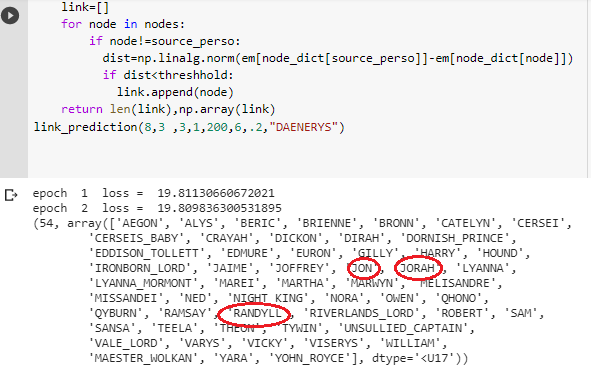

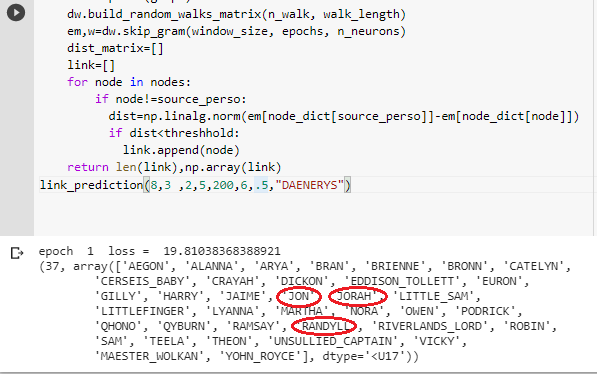

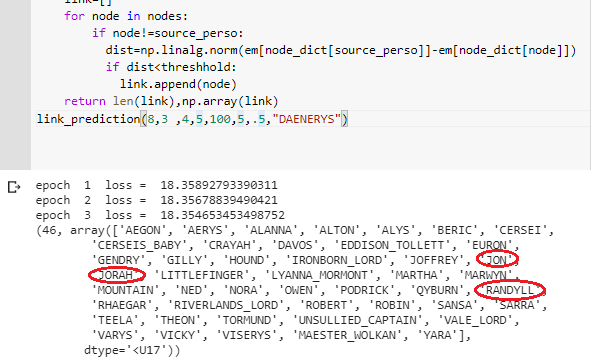

**- Did you find links present in other seasons but not in this one?**
Yes, for example while "VARYS" had link with "DAENERYS" in previous seasons, he has no link with "DAENERYS" in  season 8, but it was found to have a link using this algorith. Other example is 'NED' which here we find has link with "DAENERYS" but in reality there is no link in season 8 between two characters. However there is a link between them in season 7. "TYWIN" is another example, they have link in season 7.



**- How did the parameter impacts your results?** 
the parameters "window_size","epochs","n_neurons","n_walk","walk_length" determine the distance between vectors of each character in embedded matrix. In order to have the desired links "threshold" should be adjusted which is the limit that algorithm chooses if a link exist or not, therefore its value determines how many link we will have. for instance as figure below shows changing "Nerons" number from 5 to 15 and then 35 causes to have  1 and 0 connection respectively. Increasing number of walk and walk length increase the probability of getting more realistic picture of links because they provide more sampling.


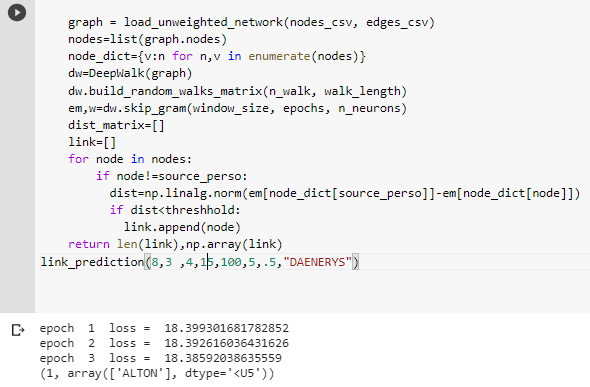

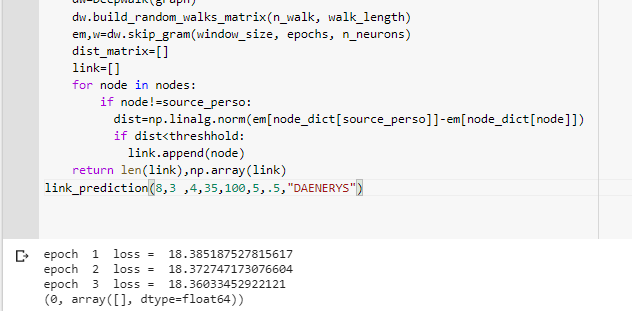

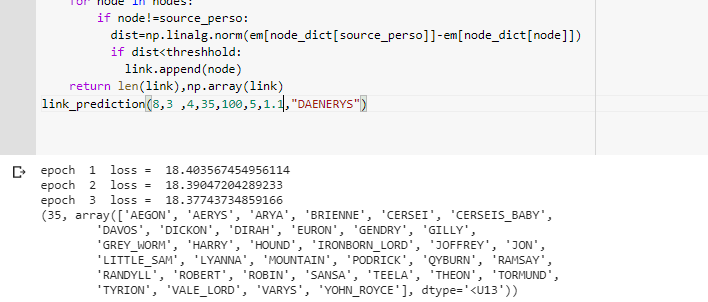